# ***CONFIGURATION***

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'customer-buying-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4923040%2F8288194%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240609%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240609T005456Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7bb62bfabca8810d7338ad1ee7fb82a8534d3433dc4d365b820e33a6c24aa34ef64856f717aa02026838cf44fce8008bb22a4be2a2f8648800e4a478ee6700486afb360890cfc57ea399fbc253a8bed7a0b52461b5fc565d1fba353de2e137f403dcfe5da25108a51ad884cdfb946cda4e34eb3ee2418beec2ab8514a4a2d40d7901630336a69e1c1a8fc10c1d0d3e753705ceffbc770272381de5b6180f958d8835cb4437e1771735e20019ff327ca12b3cf2c7eaf5eb7b2f2922d90895f802a0113825078c7efaf5606535ffc61b5c190f4b99591e38ba6e58fe01397cdf74321c212d9914584fd5881567a18906b9a2c97b713a006645fde84139a3f3565d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 31145 bytes downloaded
Downloaded and uncompressed: customer-buying-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-buying-dataset/customer_dataset.xlsx


# ***IMPORT DEPENDENCIES***

In [ ]:
!pip install pywaffle -q

In [ ]:
# Import dependencies

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FixedLocator, FixedFormatter


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette

from pywaffle import Waffle

import scipy.cluster.hierarchy as shc




import warnings
warnings.filterwarnings("ignore")

In [ ]:
FILE_PATH = r'/kaggle/input/customer-buying-dataset/customer_dataset.xlsx'
data = pd.read_excel(FILE_PATH)

data.head()

,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day
0,10001,East,Paypal,Web,20.19,Online,22:19:00
1,10002,West,Credit,Web,17.85,Online,13:27:00
2,10003,North,Credit,Web,23.98,Online,14:27:00
3,10004,West,Paypal,Email,23.51,Book,15:38:00
4,10005,South,Credit,Web,15.33,Book,15:21:00


In [ ]:
data.columns

Index(['Cust iD', 'Region', 'Payment_mode ', 'how_they_buy', 'Amount_in_usd',
       'Product_type', 'Time Of Day'],
      dtype='object')

"As we can see, there is a space after 'Payment_mode'. We need to remove it to easily reference the column."

In [ ]:
# Rename 'Payment_mode '
data = data.rename(columns={'Payment_mode ': 'Payment_mode'})

# EXPLORATERY DATA ANALYSIS & FEATURE ENGINEERING

## constant & style

In [ ]:
# Choose a Matplotlib colormap
CMAP_PASTEL = cm.get_cmap('Pastel1')
CMAP_TAB = cm.get_cmap('tab20c')
CLUSTER_COLORS=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']

In [ ]:
# --- Figures Settings ---
SCATTER_STYLE = dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
LEGEND_STYLE = dict(borderpad=2, frameon=False, fontsize=8)
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
text_style=dict(fontweight='bold', fontfamily='serif')


## DATA INFO~

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 510 entries, 0 to 509

Data columns (total 7 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Cust iD        510 non-null    int64  

 1   Region         510 non-null    object 

 2   Payment_mode   510 non-null    object 

 3   how_they_buy   510 non-null    object 

 4   Amount_in_usd  510 non-null    float64

 5   Product_type   510 non-null    object 

 6   Time Of Day    510 non-null    object 

dtypes: float64(1), int64(1), object(5)

memory usage: 28.0+ KB



as we can see, <span style="background-color:lightblue">there are no missing values </span> and most of the <span style="background-color:purple; color:white">columns with dtype object need to be encoded properly</span>

In [ ]:
print('column_name:\tnumber of unique values')
for col in data.columns:
    print(f'{col}:\t{data[col].nunique()}')

column_name:	number of unique values

Cust iD:	510

Region:	4

Payment_mode:	2

how_they_buy:	2

Amount_in_usd:	420

Product_type:	2

Time Of Day:	288


The number of unique values for the "Amount_in_usd" and "Time_Of_Day" columns is relatively large. We may need to simplify their representation to make it easier for clustering algorithms to detect meaningful patterns in the data.

In [ ]:
data.describe()

,Cust iD,Amount_in_usd
count,510.000000,510.000000
mean,10255.500000,38.826686
std,147.368586,56.034412
min,10001.000000,15.060000
25%,10128.250000,17.732500
50%,10255.500000,20.465000
75%,10382.750000,23.370000
max,10510.000000,247.140000


The values of the mean, 25th percentile, and 75th percentile seem close together for numerical columns, indicating symmetry in these columns. but the std is high which violate our assumption.

In [ ]:
NUMERICAL_COLUMNS = data.select_dtypes(include='number')


# classification thresholds
NOT_SKEWED_THRESHOLD = 0.5
MILDLY_SKEWED_THRESHOLD = 1.0

# Calculate the skewness
skewness = NUMERICAL_COLUMNS.skew()


# Classify columns based on skewness
skew_classification = pd.cut(x=skewness,
                        bins=[float('-inf'), -MILDLY_SKEWED_THRESHOLD, -NOT_SKEWED_THRESHOLD, NOT_SKEWED_THRESHOLD, MILDLY_SKEWED_THRESHOLD, float('inf')],
                        labels=['Highly Skewed', 'Mildly Skewed', 'Not Skewed', 'Mildly Skewed','Highly Skewed'],
                        ordered=False  # ordered=False for duplicate labels
                        )

classification_df = pd.DataFrame({'Skewness': skewness, 'Classification': skew_classification})
classification_df.drop("Skewness", axis=1, inplace=True)

# Style the DataFrame to highlight the 'Classification' column
styled_classification = classification_df.style.apply(lambda x: ['background-color: #CB65F1' if c == 'Highly Skewed' else '' for c in x],
                                                      subset=['Classification'] # the styling should be applied only to the 'Classification' column.
                                                     )

styled_classification

,Classification
Cust iD,Not Skewed
Amount_in_usd,Highly Skewed


## FEATURE ENGINEERING

some feature enginering that might help us understand the data better

In [ ]:
# Feature engineering (reducing the dimensionality of the 'Time of Day' feature)

## Extract hour component from 'Time Of Day' column
data['Hour_of_Day'] = data['Time Of Day'].apply(lambda x: x.hour if x.minute <= 45 else x.hour + 1)

data.head()

,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day,Hour_of_Day
0,10001,East,Paypal,Web,20.19,Online,22:19:00,22
1,10002,West,Credit,Web,17.85,Online,13:27:00,13
2,10003,North,Credit,Web,23.98,Online,14:27:00,14
3,10004,West,Paypal,Email,23.51,Book,15:38:00,15
4,10005,South,Credit,Web,15.33,Book,15:21:00,15


In [ ]:
# Function to convert HH:MM:SS to total minutes
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60.0

# Convert the 'time' column from category to string if it's not already
data['Time Of Day'] = data['Time Of Day'].astype(str)

# Apply the function to the 'time' column
data['Time'] = data['Time Of Day'].apply(time_to_minutes)
data

,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day,Hour_of_Day,Time
0,10001,East,Paypal,Web,20.19,Online,22:19:00,22,1339.0
1,10002,West,Credit,Web,17.85,Online,13:27:00,13,807.0
2,10003,North,Credit,Web,23.98,Online,14:27:00,14,867.0
3,10004,West,Paypal,Email,23.51,Book,15:38:00,15,938.0
4,10005,South,Credit,Web,15.33,Book,15:21:00,15,921.0
...,...,...,...,...,...,...,...,...,...
505,10506,South,Credit,Web,16.35,Book,22:29:00,22,1349.0
506,10507,West,Paypal,Web,23.70,Book,20:43:00,20,1243.0
507,10508,South,Credit,Web,22.02,Online,11:55:00,12,715.0
508,10509,East,Paypal,Web,23.53,Online,21:52:00,22,1312.0


In [ ]:


labels = ['12am to 6am', '6am to 12pm', '12pm to 6pm', '6pm to 12am']
hour_groups = pd.cut(data['Hour_of_Day'], bins=[0, 6, 12, 18, 24], right=False, labels=labels)
data['hour_groups'] = hour_groups

By the above lines of code, we reduced the number of unique values in the 'Time of Day' column by considering only the hours to. <span style="background-color:lightblue"> This can help in clustering by simplifying the representation of time-related information, making it easier for clustering algorithms to find meaningful patterns in the data </span>. Therefore, there is no longer a need for the 'Time of Day' column, and we can replace it with the 'Hour of Day' column.

In [ ]:
# FEATURE ENGINEERING
data['Sales_Less_Than_50'] = (data['Amount_in_usd'] < 50).astype(int)

# Define a mapping dictionary for hour groups
mapping = {
    '12am to 6am': 0,
    '6am to 12pm': 1,
    '12pm to 6pm': 2,
    '6pm to 12am': 3
}

# Map hour groups to numerical values
data['Hour_Group_Num'] = data['hour_groups'].map(mapping)

In [ ]:
data.isnull().sum()

Cust iD               0
Region                0
Payment_mode          0
how_they_buy          0
Amount_in_usd         0
Product_type          0
Time Of Day           0
Hour_of_Day           0
Time                  0
hour_groups           0
Sales_Less_Than_50    0
Hour_Group_Num        0
dtype: int64

GOOD news the new columns created has no missing interval

## PLOT THE DATA

In [ ]:
# --- CALLBACKS ----

def plot_pie(data: pd.Series, title: str = None, axes=None):
    """
    INPUT: data THE COLUMN THAT WE WANT TO PLOT THE DISTRIBUTION OF IT IN DATA
    OUTPUT: PLOT A PIE PLOT OF THE DATA WITH PERCENTAGE OF DISTRIBUTION OF LABELS
    """

    # IDENTIFY THE PARAM FOR PLOTS
    x = data.value_counts()
    labels = x.index

    if axes is None:
        # If axes is not provided, create a new figure and subplot
        fig, axes = plt.subplots()
        created_figure = True
    else:
        created_figure = False



    # Get colors from the colormap
    colors = CMAP_PASTEL(range(len(labels)))
    # Configure the plot
    axes.pie(x=x, labels=labels, colors=colors,
              autopct='%1.1f%%',
              startangle=90)

    if title:
        axes.set_title(title)
    else:
        name = data.name
        axes.set_title(f'{name} Distribution')

    # Show plot if a new figure was created
    if created_figure:
        plt.show()

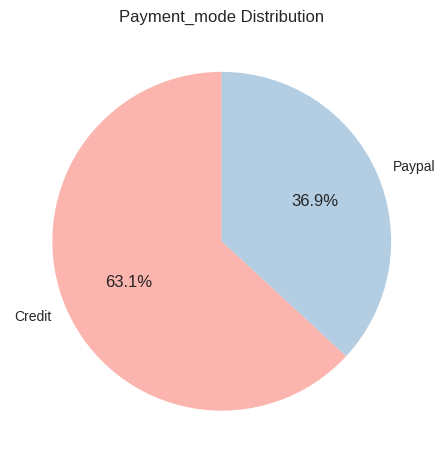

In [ ]:
plot_pie(data["Payment_mode"])

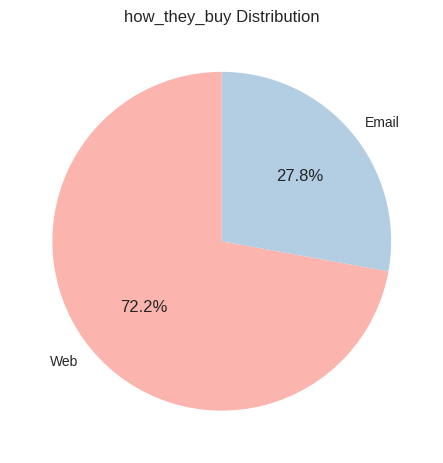

In [ ]:
plot_pie(data['how_they_buy'])

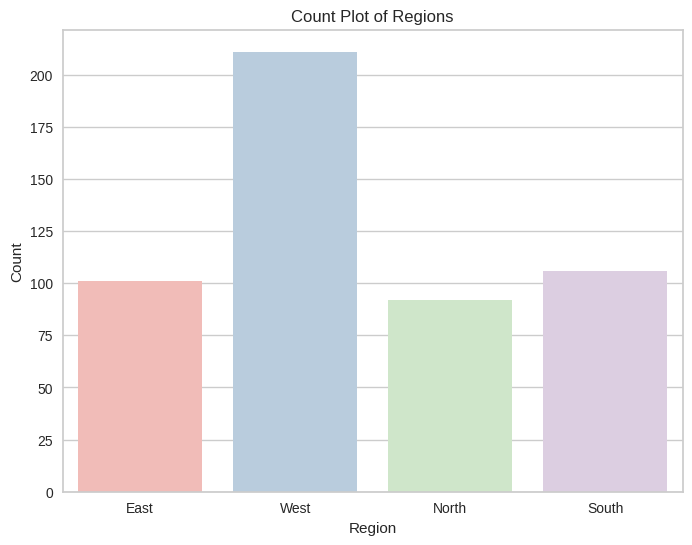

In [ ]:
# Get unique regions
regions = data['Region'].unique()

# Create a dictionary to store colors for each region
region_colors = {region: CMAP_PASTEL(i) for i, region in enumerate(regions)}

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Region', palette=region_colors)
plt.title('Count Plot of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

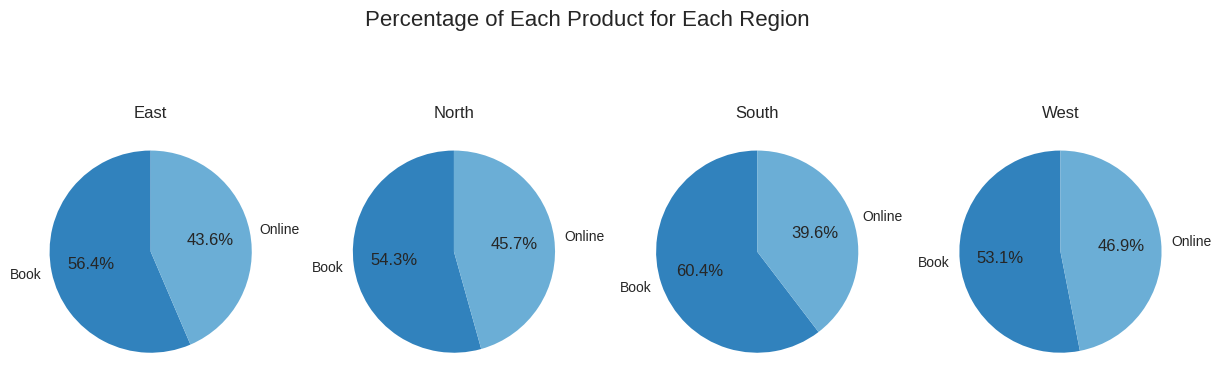

In [ ]:

# Grouping by both Region and Product and counting occurrences
grouped = data.groupby(['Region', 'Product_type']).size().unstack(fill_value=0)

# Define colors for products
product_colors = {product: CMAP_TAB(i) for i, product in enumerate(grouped.columns)}

# Plotting
fig, axs = plt.subplots(1, len(grouped), figsize=(15, 5))

for i, (region, products) in enumerate(grouped.iterrows()):
    axs[i].pie(products, labels=products.index,
               autopct='%1.1f%%', startangle=90,
               colors=[product_colors[product] for product in products.index])
    axs[i].set_title(region)

plt.suptitle('Percentage of Each Product for Each Region', fontsize=16)
plt.show()

In [ ]:
data.columns

Index(['Cust iD', 'Region', 'Payment_mode', 'how_they_buy', 'Amount_in_usd',
       'Product_type', 'Time Of Day'],
      dtype='object')

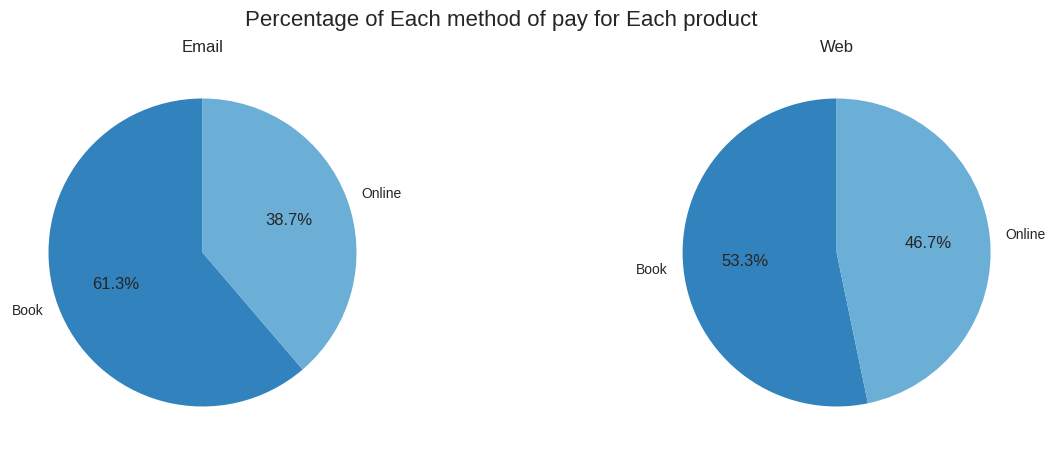

In [ ]:
grouped = data.groupby(['how_they_buy', 'Product_type']).size().unstack(fill_value=0)
fig, axs = plt.subplots(1, len(grouped), figsize=(15, 5))

for i, (region, products) in enumerate(grouped.iterrows()):
    axs[i].pie(products, labels=products.index,
               autopct='%1.1f%%', startangle=90,
               colors=[product_colors[product] for product in products.index])
    axs[i].set_title(region)

plt.suptitle('Percentage of Each method of pay for Each product', fontsize=16)
plt.show()

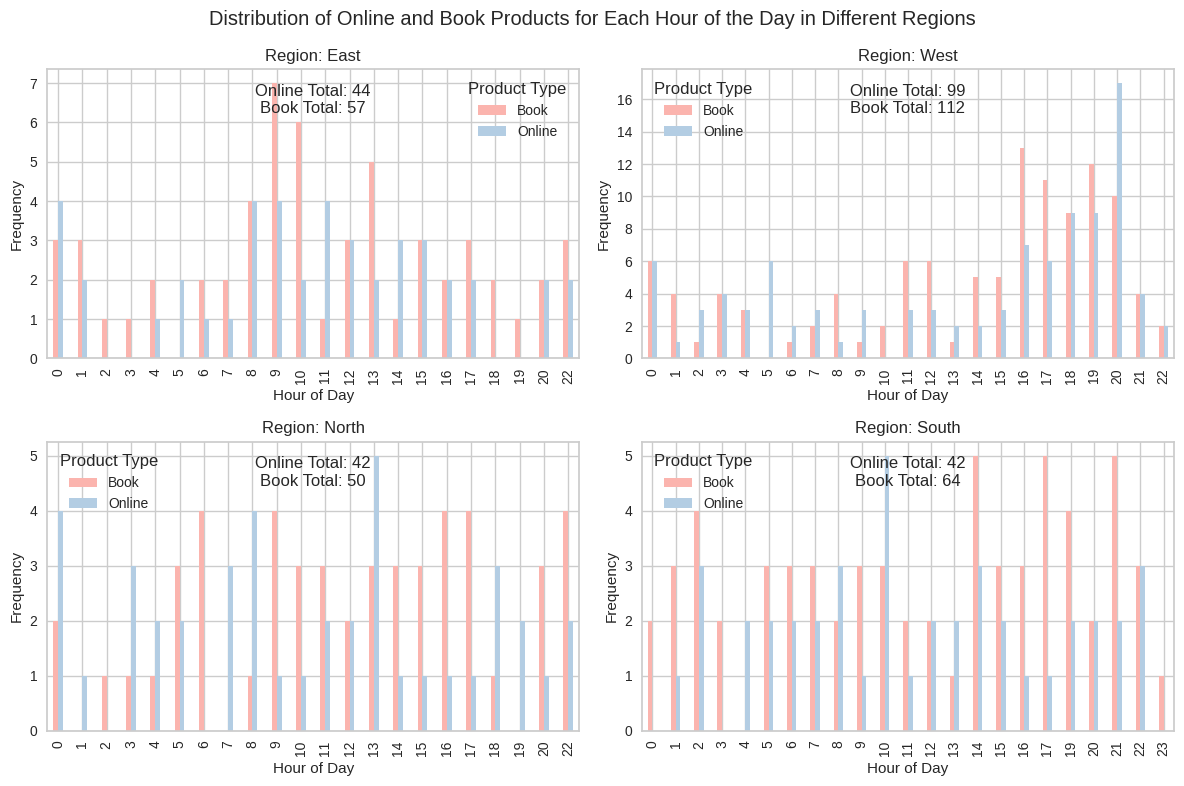

In [ ]:
regions = data['Region'].unique()
# Define colors for online and book products

online_color,  book_color= CMAP_PASTEL(range(2))

# Create subplots for each region
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Online and Book Products for Each Hour of the Day in Different Regions')

# Plot distribution of online and book products for each hour in each region
for i, region in enumerate(regions):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    region_data = data[data['Region'] == region]
    # Group data by hour and product type
    grouped_data = region_data.groupby(['Hour_of_Day', 'Product_type']).size().unstack(fill_value=0)


    grouped_data.plot(kind='bar', ax=ax, width=0.4,\
                      color=[online_color, book_color])

    ax.set_title(f'Region: {region}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Frequency')
    ax.legend(title='Product Type')

    online_total = grouped_data['Online'].sum()
    book_total = grouped_data['Book'].sum()
    ax.text(0.5, 0.95, f'Online Total: {online_total}\nBook Total: {book_total}',
            horizontalalignment='center', verticalalignment='top', transform=ax.transAxes)


plt.tight_layout()
plt.show()


From the above figure, it is obvious that the sales of books are higher than the sales of online products for all regions, with the highest sales existing in the West.

In [ ]:
data.head()

,Cust iD,Region,Payment_mode,how_they_buy,Amount_in_usd,Product_type,Time Of Day,Hour_of_Day,hour_groups,Sales_Less_Than_50,Hour_Group_Num
0,10001,East,Paypal,Web,20.19,Online,22:19:00,22,6pm to 12am,1,3
1,10002,West,Credit,Web,17.85,Online,13:27:00,13,12pm to 6pm,1,2
2,10003,North,Credit,Web,23.98,Online,14:27:00,14,12pm to 6pm,1,2
3,10004,West,Paypal,Email,23.51,Book,15:38:00,15,12pm to 6pm,1,2
4,10005,South,Credit,Web,15.33,Book,15:21:00,15,12pm to 6pm,1,2


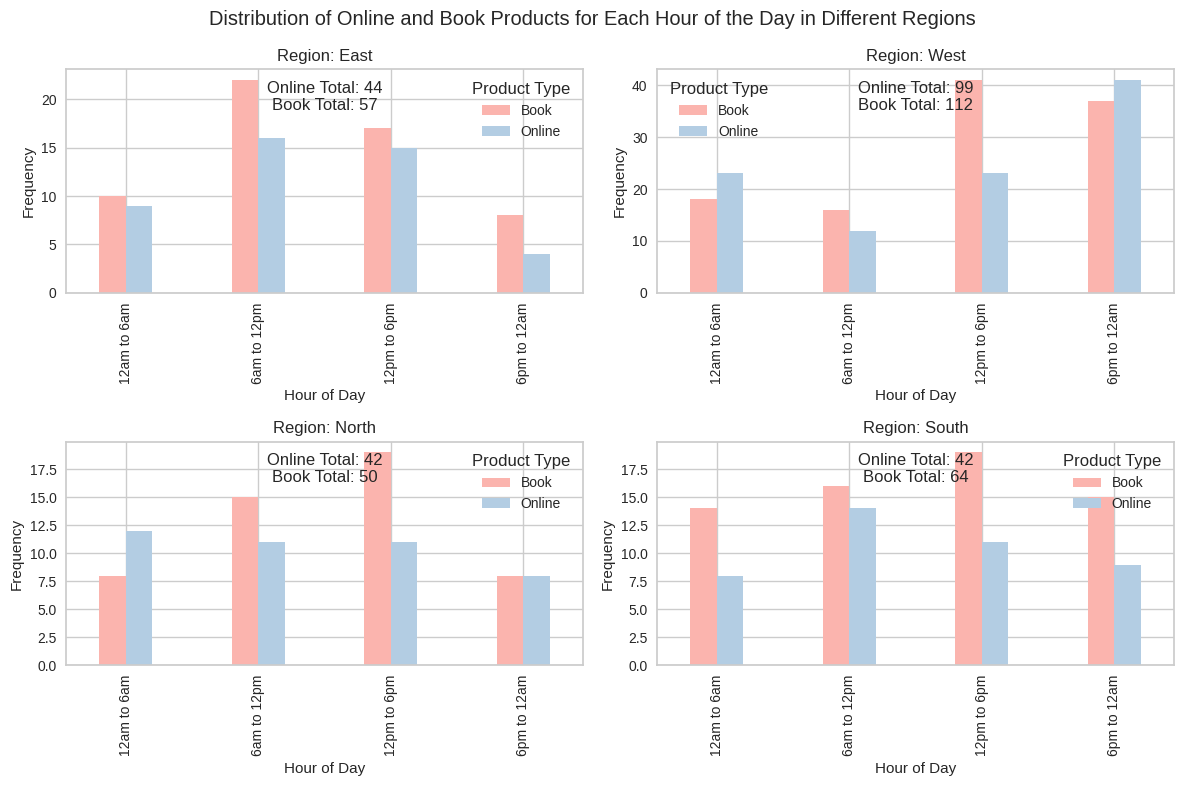

In [ ]:
regions = data.Region.unique()


# Create subplots for each region
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Online and Book Products for Each Hour of the Day in Different Regions')

# Plot distribution of online and book products for each hour in each region
for i, region in enumerate(regions):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    region_data = data[data['Region'] == region]
    # Group data by hour and product type
    grouped_data = region_data.groupby(['hour_groups', 'Product_type']).size().unstack(fill_value=0)


    grouped_data.plot(kind='bar', ax=ax, width=0.4, color=[online_color, book_color])

    ax.set_title(f'Region: {region}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Frequency')
    ax.legend(title='Product Type')

    online_total = grouped_data['Online'].sum()
    book_total = grouped_data['Book'].sum()
    ax.text(0.5, 0.95, f'Online Total: {online_total}\nBook Total: {book_total}',
            horizontalalignment='center', verticalalignment='top', transform=ax.transAxes)


plt.tight_layout()
plt.show()


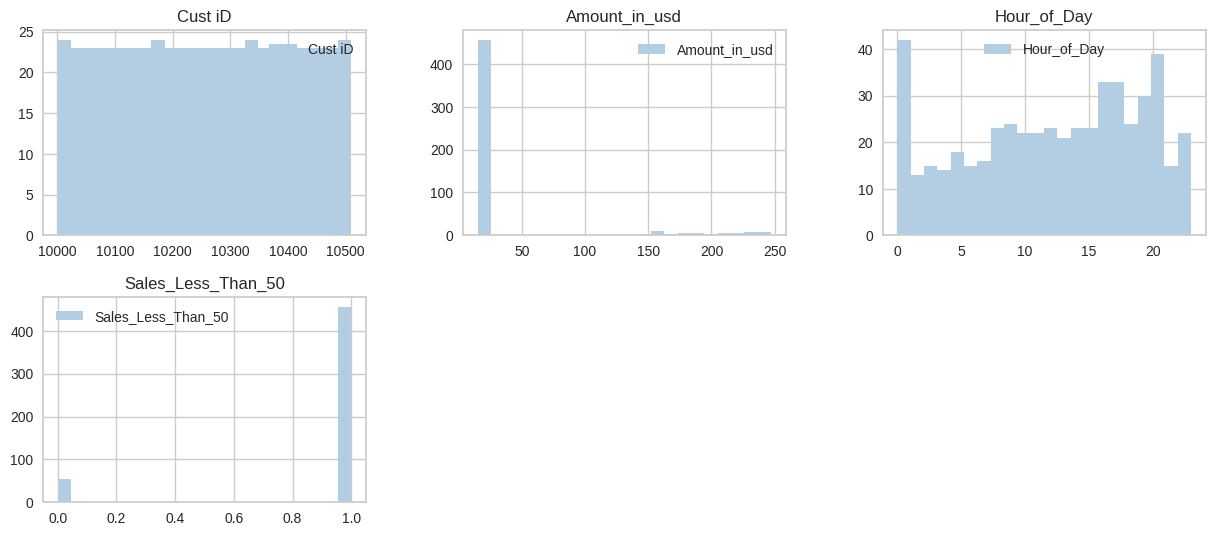

In [ ]:
num_bins = int(data.shape[0]**(1/2))
data.hist(bins=num_bins,
                  layout=(6, 3),
                  legend=True ,
                  figsize=(15, 20),
                  color=CMAP_PASTEL.colors[1])

plt.show()

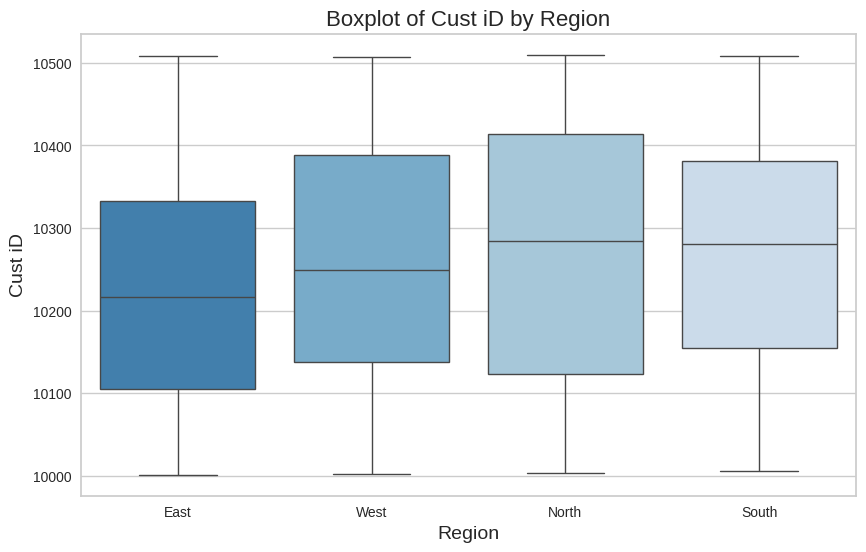

Total number of outliers in Cust iD: 0
Outliers per region for Cust iD: {'East': 0, 'West': 0, 'North': 0, 'South': 0}


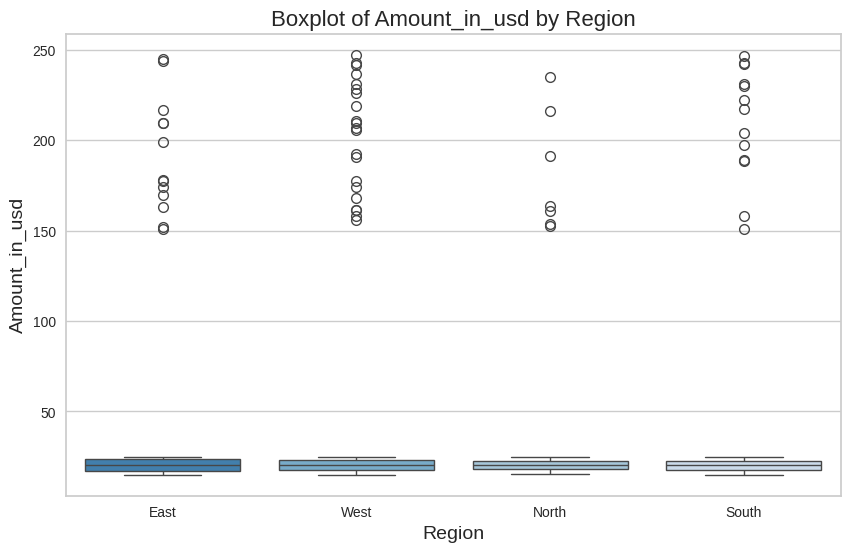

Total number of outliers in Amount_in_usd: 54
Outliers per region for Amount_in_usd: {'East': 13, 'West': 21, 'North': 7, 'South': 13}


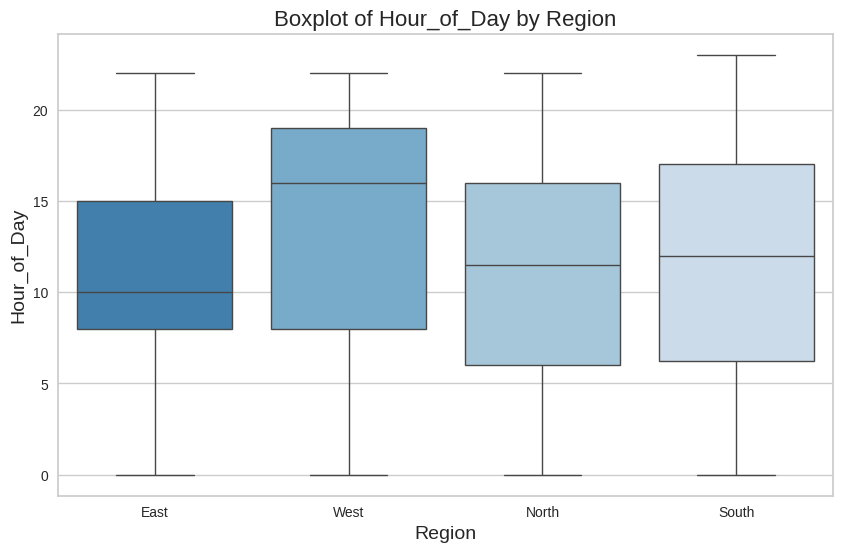

Total number of outliers in Hour_of_Day: 0
Outliers per region for Hour_of_Day: {'East': 0, 'West': 0, 'North': 0, 'South': 0}


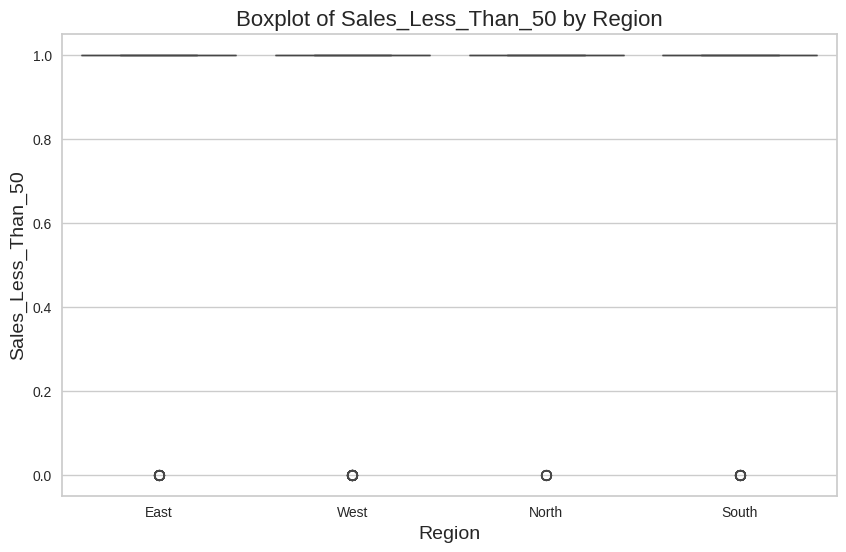

Total number of outliers in Sales_Less_Than_50: 54
Outliers per region for Sales_Less_Than_50: {'East': 13, 'West': 21, 'North': 7, 'South': 13}


In [ ]:
# Selecting only the numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

outliers_per_class = {column: {} for column in numerical_columns}

total_outliers = {column: 0 for column in numerical_columns}

for column in numerical_columns:
    for i, region in enumerate(data['Region'].unique()):
        # Filter data for the specific region
        region_data = data[data['Region'] == region][column]

        # Calculate the interquartile range (IQR)
        q1 = region_data.quantile(0.25)
        q3 = region_data.quantile(0.75)
        iqr = q3 - q1

        # Identify outliers based on the IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_mask = (region_data < lower_bound) | (region_data > upper_bound)
        outliers = region_data[outliers_mask]

        num_outliers = outliers.shape[0]
        outliers_per_class[column][region] = num_outliers

        total_outliers[column] += num_outliers

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Region", y=column, data=data, palette=[CMAP_TAB(i) for i, _ in enumerate(data['Region'].unique())])
    plt.xlabel('Region', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.title(f'Boxplot of {column} by Region', fontsize=16)
    plt.show()

    print(f'Total number of outliers in {column}: {total_outliers[column]}')
    print(f'Outliers per region for {column}: {outliers_per_class[column]}')

From the above, it's evident that there are outliers in the 'Amount in USD' column.

In [ ]:
data_less_50 = data[data['Amount_in_usd'] <= 50].shape[0]
data_higher_50 = data[data['Amount_in_usd'] >50].shape[0]

print(f'number of data point below the 50: {data_less_50}\nnumber of data point higher than 50: {data_higher_50}')

number of data point below the 50: 456

number of data point higher than 50: 54


In [ ]:
data.columns

Index(['Cust iD', 'Region', 'Payment_mode', 'how_they_buy', 'Amount_in_usd',
       'Product_type', 'Time Of Day', 'Hour_of_Day', 'hour_groups',
       'Sales_Less_Than_50', 'Hour_Group_Num'],
      dtype='object')

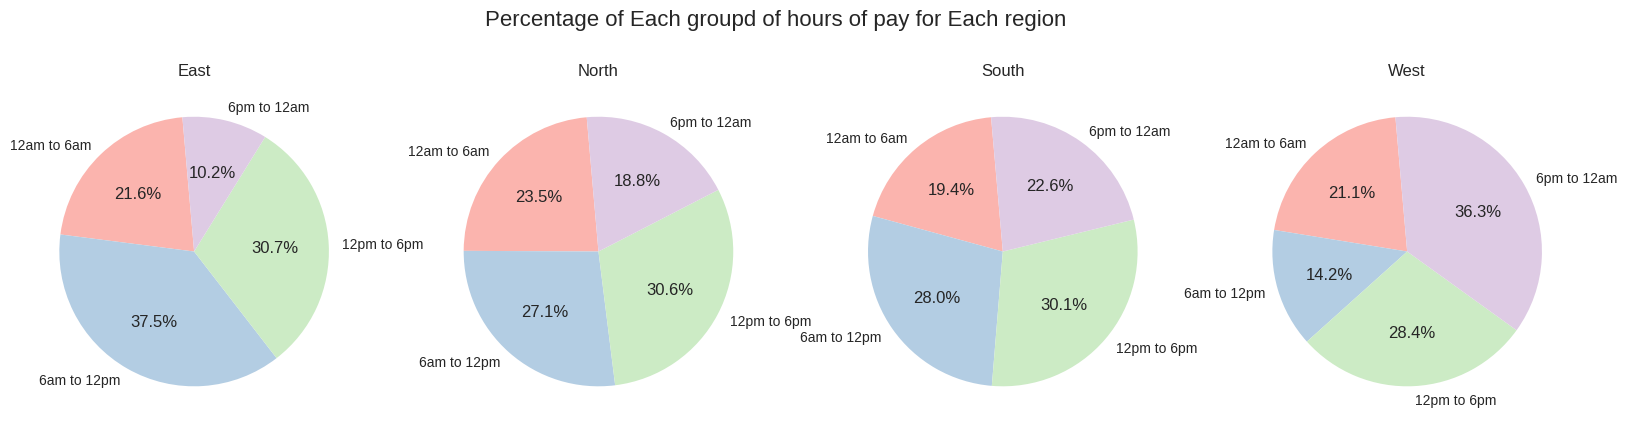

In [ ]:

grouped = data[data['Amount_in_usd'] <= 50].groupby(['Region', 'hour_groups']).size().unstack(fill_value=0)

product_colors = {product: CMAP_PASTEL(i) for i, product in enumerate(grouped.columns)}

fig, axs = plt.subplots(1, len(grouped), figsize=(20, 5))

for i, (region, products) in enumerate(grouped.iterrows()):
    axs[i].pie(products, labels=products.index,
               autopct='%1.1f%%', startangle=95,
               colors=[product_colors[product] for product in products.index])
    axs[i].set_title(region)

plt.suptitle('Percentage of Each groupd of hours of pay for Each region', fontsize=16)
plt.show()

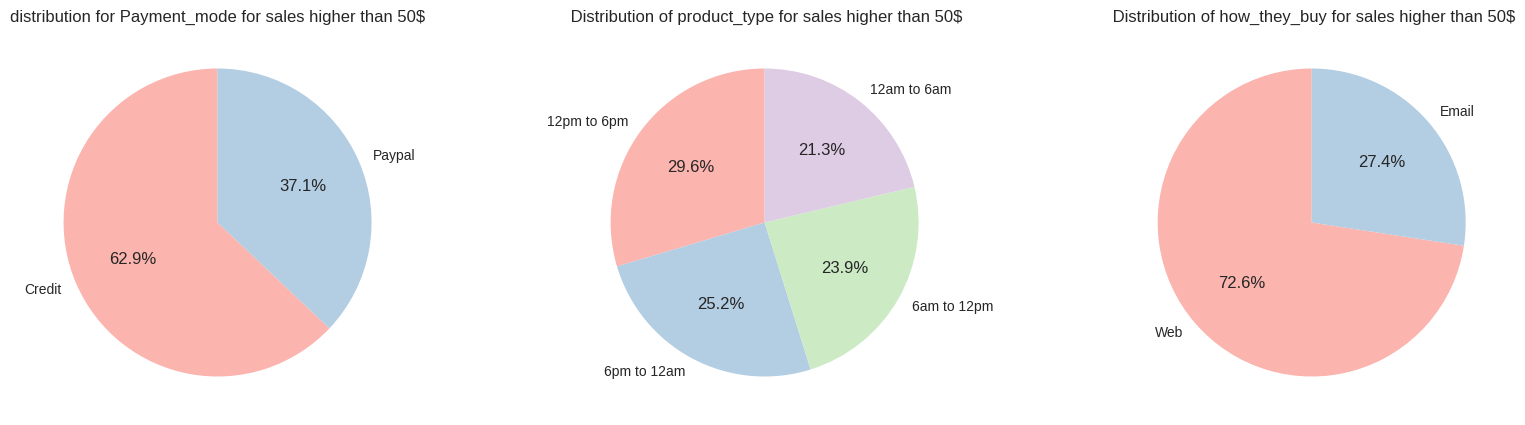

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Check if there's affect of payment mode on the amount of sales
plot_pie(data[data['Amount_in_usd'] <=50]['Payment_mode'],
         title="distribution for Payment_mode for sales higher than 50$",
         axes=axes[0])

# Check if there a relationship btw product_type and amount of sales
pie_data = data[data['Amount_in_usd'] <=50]['hour_groups']
plot_pie(data= pie_data,
         title=" Distribution of product_type for sales higher than 50$",
         axes=axes[1])

# Check if there a relationship btw product_type and amount of sales
pie_data = data[data['Amount_in_usd'] <=50]['how_they_buy']
plot_pie(data= pie_data,
         title=" Distribution of how_they_buy for sales higher than 50$",
         axes=axes[2])

Based on the above, it's evident that the payment method and how they buy has no correlation with the sales amount.







As we've observed above, all sales exceeding $50 USD were for books.

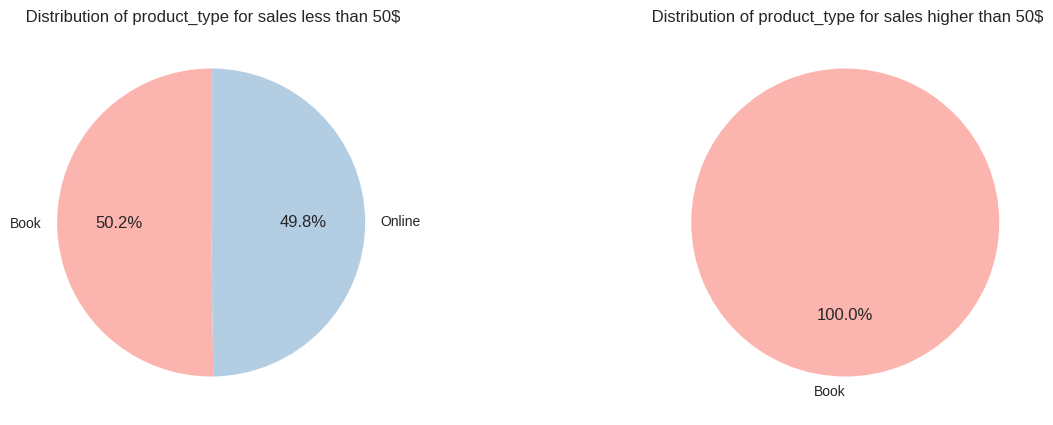

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

pie_data = data[data['Amount_in_usd'] <= 50]['Product_type']
plot_pie(data= pie_data,
         title=" Distribution of product_type for sales less than 50$",
         axes=axes[0])

# Check if there a relationship btw product_type and amount of sales
pie_data = data[data['Amount_in_usd'] >50]['Product_type']
plot_pie(data= pie_data,
         title=" Distribution of product_type for sales higher than 50$",
         axes=axes[1])

and it's the same for sales less than 50

# PREPROCESSING

In [ ]:
# DROP UNNESSAROY COLUMNS

data.drop(labels=['Cust iD', 'Time Of Day'],#, 'hour_groups'],# 'Hour_of_Day'],
          axis=1,
          inplace=True,
          errors="ignore"
          )

In [ ]:

# ENCODED categorical columns

categorical_columns = data.select_dtypes(include=['object', 'category'])

data_ = pd.get_dummies(data=data,
                       prefix=categorical_columns.columns,
                       columns=categorical_columns.columns,
                       #drop_first=True,
                       dtype='float32')
data_.head()

,Amount_in_usd,Hour_of_Day,Time,Sales_Less_Than_50,Region_East,Region_North,Region_South,Region_West,Payment_mode_Credit,Payment_mode_Paypal,...,Product_type_Book,Product_type_Online,hour_groups_12am to 6am,hour_groups_6am to 12pm,hour_groups_12pm to 6pm,hour_groups_6pm to 12am,Hour_Group_Num_0,Hour_Group_Num_1,Hour_Group_Num_2,Hour_Group_Num_3
0,20.19,22,1339.0,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,17.85,13,807.0,1,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.98,14,867.0,1,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.51,15,938.0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,15.33,15,921.0,1,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# UNIFIED THE RANGE OF THE VALUES

scaler = MinMaxScaler(feature_range=(0, 1))
data_[data_.columns] = scaler.fit_transform(data_[data_.columns])

data_.head()

,Amount_in_usd,Hour_of_Day,Time,Sales_Less_Than_50,Region_East,Region_North,Region_South,Region_West,Payment_mode_Credit,Payment_mode_Paypal,...,Product_type_Book,Product_type_Online,hour_groups_12am to 6am,hour_groups_6am to 12pm,hour_groups_12pm to 6pm,hour_groups_6pm to 12am,Hour_Group_Num_0,Hour_Group_Num_1,Hour_Group_Num_2,Hour_Group_Num_3
0,0.022104,0.956522,0.973818,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.012022,0.565217,0.586909,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.038435,0.608696,0.630545,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.036410,0.652174,0.682182,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.001163,0.652174,0.669818,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


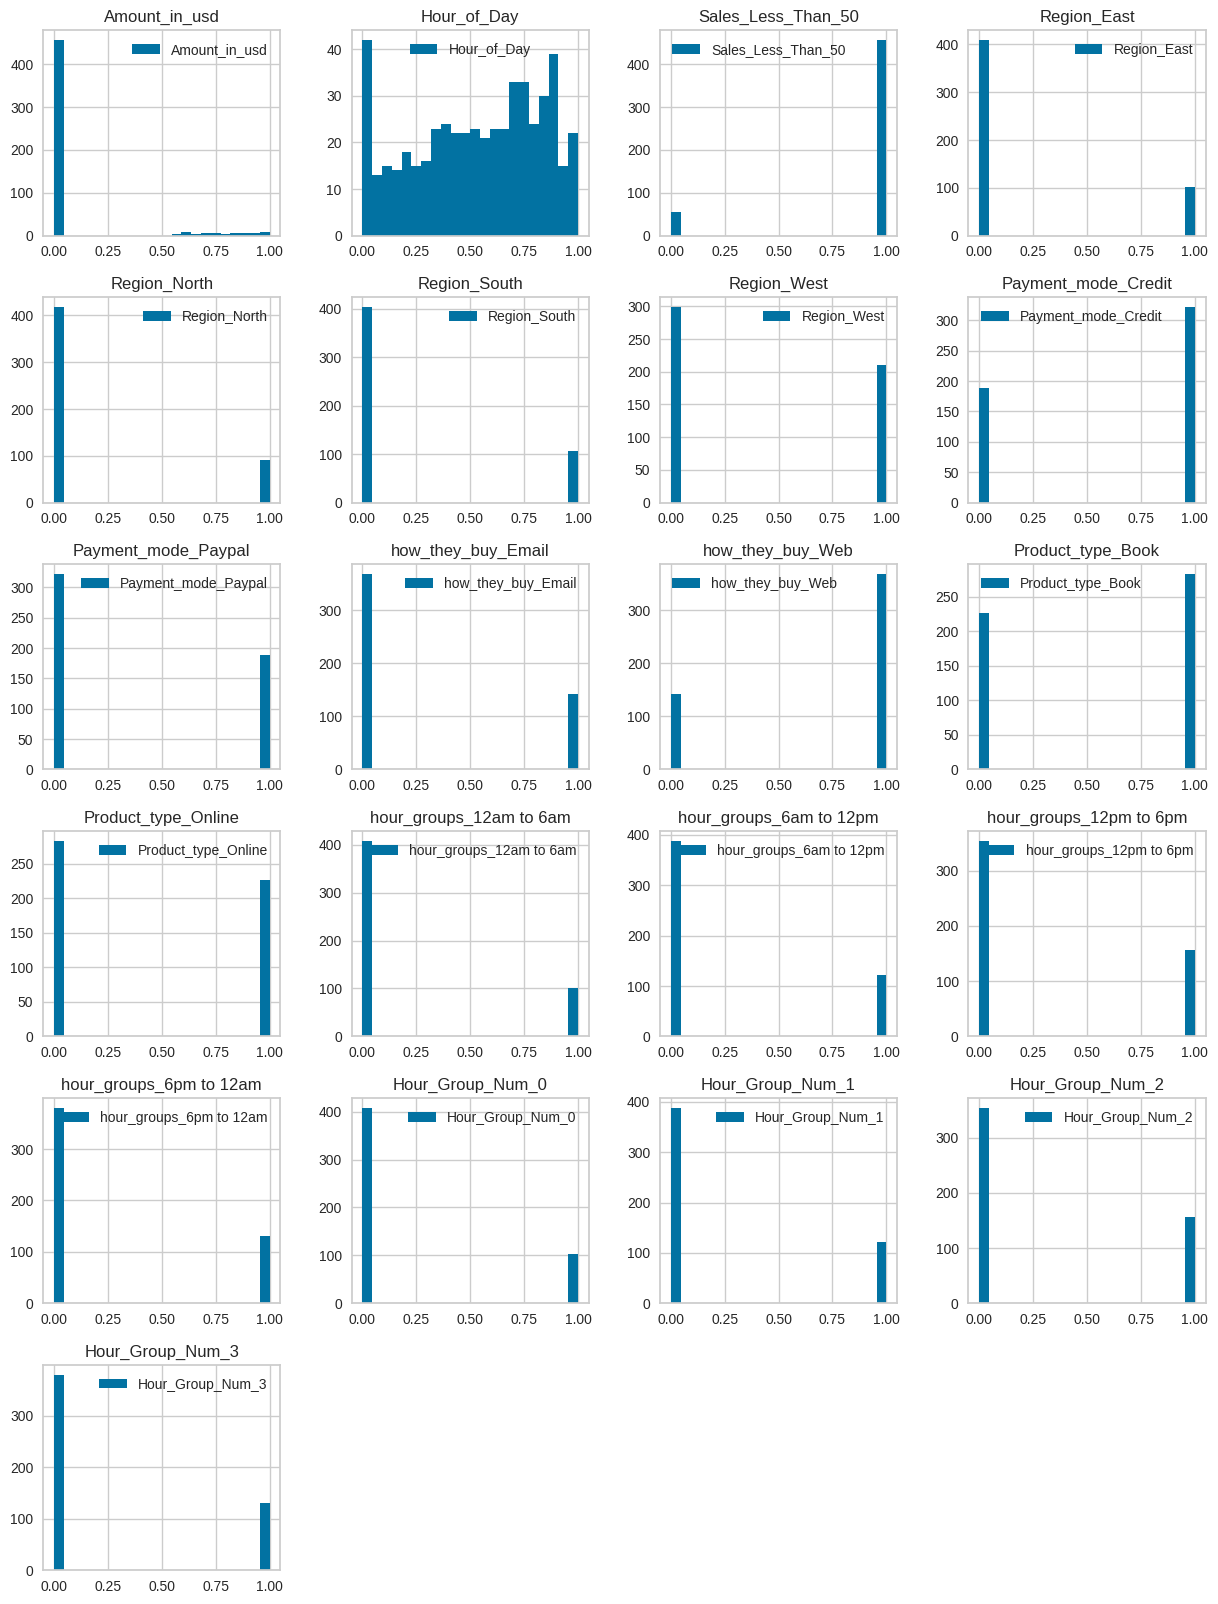

In [ ]:
#PLOT THE HISTOGRAM OF DATA
num_bins = int(data.shape[0]**(1/2))
data_.hist(bins=num_bins,
                  layout=(6, 4),
                  legend=True ,
                  figsize=(15, 20)
                  )
plt.show()

<Axes: >

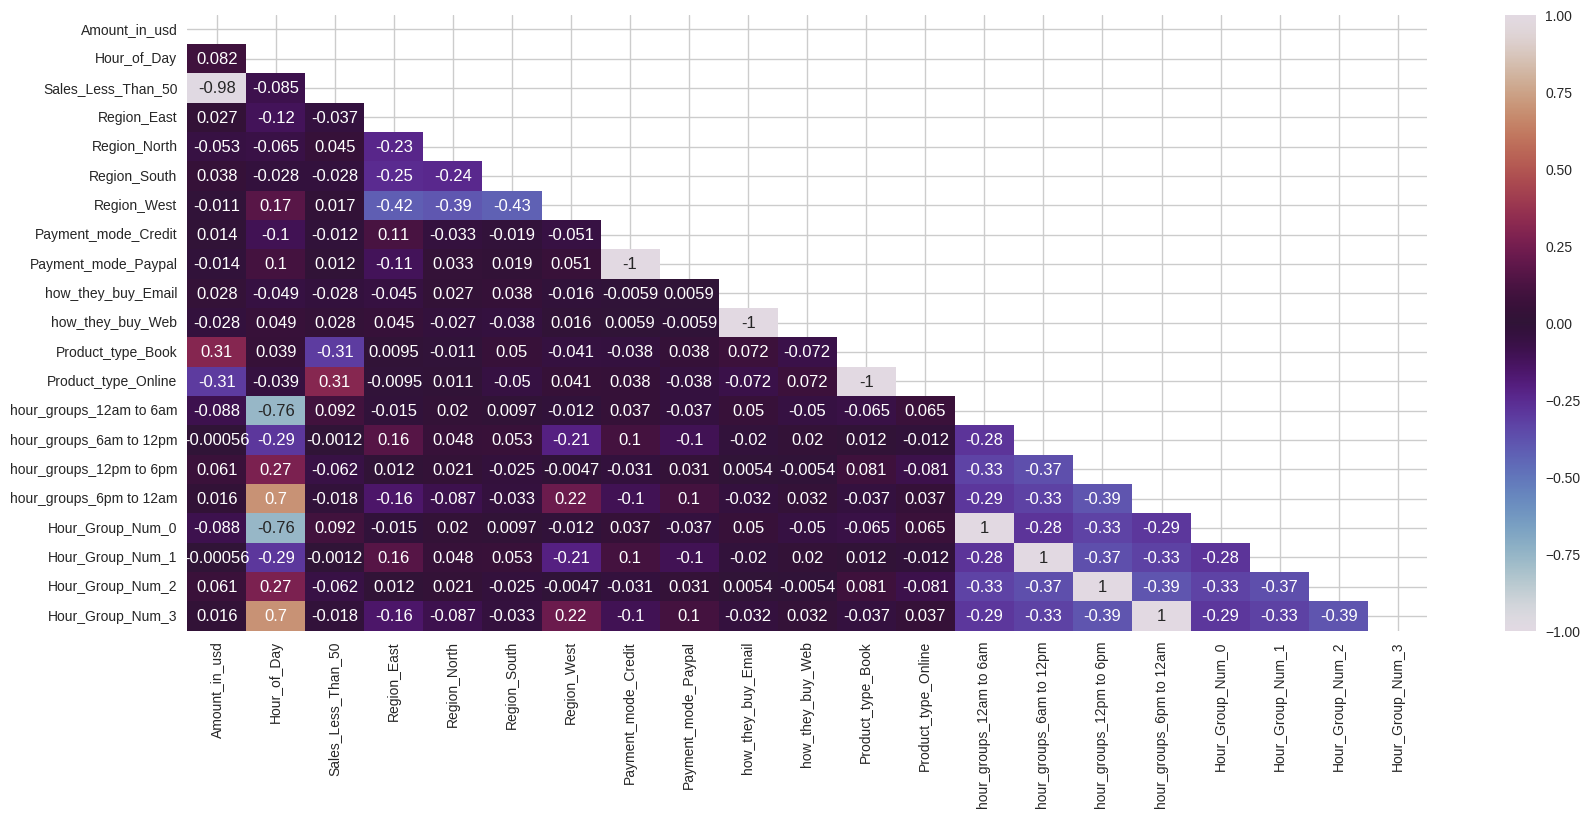

In [ ]:
# Check the correlation between columns
NUMERICAL_COLUMNS = data_.select_dtypes(include='number')

correlation = NUMERICAL_COLUMNS.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(20,8))
sns.heatmap(data=data_.corr(),
            mask=mask,
            cmap="twilight",
            annot=True #write the data value in each cell.
            )

## FEATURE SELECTION

To see the usefulness of each feature, we convert our problem from an unsupervised one to a supervised one by taking the most important feature in our domain, which is the product type. We then assess how much each feature contributes to the discrimination of product types.

In [ ]:
def f_measure(data):
    """
    THIS FUNCTION WILL PROVIDE US WITH THE DISCRIMINATION FOR EACH NUMERICAL COLUMNS
    INPUT: the columns that we want measure the discrimination for each of them
    OUTPUT: the f_measure for each of them
    """

    columns = data.columns

    f_measures = {}

    for column in columns:

        ## split the data in two groups product_type == 0 and product_type == 1
        group1 = data[data['Product_type_Book'] == 0][column]
        group2 = data[data['Product_type_Book'] == 1][column]

        avg1 = np.mean(group1)
        avg2 = np.mean(group2)
        overall_avg = (avg1 + avg2) / 2

        numerator = (avg1 - overall_avg)**2 + (avg2 - overall_avg)**2

        n_pos = len(group1)
        n_neg = len(group2)

        sum1 = sum((x - avg1)**2 for x in group1)
        sum2 = sum((x - avg2)**2 for x in group2)

        denominator = (1 / (n_pos - 1)) * sum1 + (1 / (n_neg - 1)) * sum2

        f_measure = numerator / denominator

        f_measures[column] = f_measure

    f_measures = dict(sorted(f_measures.items(),
                             key=lambda item: item[1],
                             reverse=True))
    return f_measures


In [ ]:
data_.columns

Index(['Amount_in_usd', 'Hour_of_Day', 'Sales_Less_Than_50', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Payment_mode_Credit',
       'Payment_mode_Paypal', 'how_they_buy_Email', 'how_they_buy_Web',
       'Product_type_Book', 'Product_type_Online', 'hour_groups_12am to 6am',
       'hour_groups_6am to 12pm', 'hour_groups_12pm to 6pm',
       'hour_groups_6pm to 12am', 'Hour_Group_Num_0', 'Hour_Group_Num_1',
       'Hour_Group_Num_2', 'Hour_Group_Num_3'],
      dtype='object')

In [ ]:
f_measure(data_)


{'Product_type_Book': inf,
 'Product_type_Online': inf,
 'Sales_Less_Than_50': 0.11748730846976456,
 'Amount_in_usd': 0.11482097151303093,
 'hour_groups_12pm to 6pm': 0.006675427762108294,
 'Hour_Group_Num_2': 0.006675427762108294,
 'how_they_buy_Email': 0.005328110631093633,
 'how_they_buy_Web': 0.005328110631093623,
 'hour_groups_12am to 6am': 0.004245094366731922,
 'Hour_Group_Num_0': 0.004245094366731922,
 'Region_South': 0.0025855588795187135,
 'Region_West': 0.0016727480214174465,
 'Time': 0.0016557952587971964,
 'Hour_of_Day': 0.001565725767992218,
 'Payment_mode_Paypal': 0.0014815413043097875,
 'Payment_mode_Credit': 0.001481541304309779,
 'hour_groups_6pm to 12am': 0.0014098193295242554,
 'Hour_Group_Num_3': 0.0014098193295242554,
 'hour_groups_6am to 12pm': 0.00014643580441939957,
 'Hour_Group_Num_1': 0.00014643580441939957,
 'Region_North': 0.00011702611987340494,
 'Region_East': 9.025516186879615e-05}

In [ ]:
sub_data = data_[['Region_East', 'Region_North',
       'hour_groups_6am to 12pm', 'hour_groups_6pm to 12am', 'Product_type_Book',
                  'Product_type_Online',
  ]]

sub_data = data_[['Sales_Less_Than_50', 'Amount_in_usd',
             'Product_type_Book', 'Product_type_Online',
             'hour_groups_12pm to 6pm',

]]

In [ ]:
from sklearn.decomposition import PCA

N_COMPONENTS = 2
pca = PCA(n_components=N_COMPONENTS)

pca_result = pca.fit_transform(sub_data)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i}' for i in range(1, N_COMPONENTS+1)])

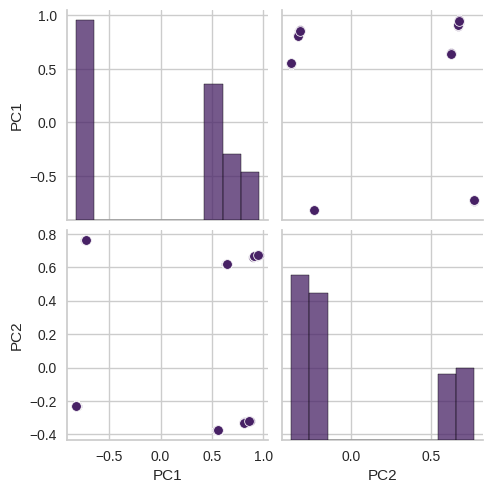

In [ ]:
sns.pairplot(pca_df)

# ***MODELING***

## CALLBACKS

the below are callbacks that we will use to judge the quality of the clusters

In [ ]:
def df_results(n_clusters: list, silhouette_scores: list, model_name,\
               min_samples: list = None, eps: list = None) -> pd.DataFrame:
    """
    This function take multiple value of n_cluster and the score of it
    for the given model and return the result df with some style
    """

    results_df = pd.DataFrame({'Number of Clusters': n_clusters,
                               'Silhouette Score': silhouette_scores})

    # Append optional data if provided
    if min_samples is not None:
        data['Min Samples'] = min_samples
    if eps is not None:
        data['Epsilon'] = eps

    results_df_styled = results_df.style.highlight_max(subset=['Silhouette Score'], color='lightgreen')
    results_df_styled.name = "\033[1m\033[92m" + f"resulted_df for {model_name}" + "\033[0m"
    print(results_df_styled.name)

    return results_df_styled

In [ ]:

def plot_silhouette(data, clusterer, n_clusters):
    """
    INPUT: THE 'data' THAT WE GIVE TO THE 'clusterer' ALGORITHM & 'n_clusters'
     THAT WE WANT TO SEE THE SILHOUTE DIAGRAM FOR EACH ONE

    OUTPUT: PLOT SILHOUTE DIAGRAM WITH SCORE FOR EACH VALUE OF 'n_clusters'
    """

    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    plt.figure(figsize=(6, 9))

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)

        # Label the silhouette plot with cluster numbers
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.annotate(f'Silhouette Score: {silhouette_avg:.2f}', xy=(0.5, -0.1), xycoords='axes fraction',
                 ha='center', fontsize=10)
    plt.title("Silhouette plot")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(-0.1, 1.1, 0.2))

    plt.annotate(f'Silhouette Score: {silhouette_avg:.2f}', xy=(0.5, -0.1), xycoords='axes fraction',
                 ha='center', fontsize=10)

    plt.show()



In [ ]:

def plot_cluster_data(model, data, labels, ax=None):

    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    cmap = plt.cm.viridis
    colors = [cmap(i / n_clusters) for i in range(n_clusters)]

    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()

    scatter = ax.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    #ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=65, c='#FF0000', label='Centroids', **SCATTER_STYLE)


    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i / n_clusters), markersize=10, label=f'Cluster {i+1}') for i in unique_labels]
    #handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF0000', markersize=10, label='Centroids'))

    ax.legend(handles=handles, bbox_to_anchor=(0.95, -0.05), loc='center', ncol=n_clusters, **LEGEND_STYLE)

    ax.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('#CAC9CD')

    k = n_clusters
    ax.set_title(f'Cluster Distribution with k = {k}')
    ax.set_xlabel('Component 1' if pca_df.shape[1] > 1 else 'Feature 1')
    ax.set_ylabel('Component 2' if pca_df.shape[1] > 1 else 'Feature 2')
    plt.colorbar(scatter, label='Cluster', ax=ax)

    if ax is None:
        plt.show()




In [ ]:
def plot_waffle_chart(labels, ax=None):
    """
    Plots a waffle chart for cluster distribution.

    Parameters:
    - labels: array-like, cluster labels from any clustering model.
    - CLUSTER_COLORS: list, colors for each cluster.
    - title: dict, title style properties.
    - text_style: dict, text style properties.
    - ax: matplotlib.axes.Axes, optional, axes on which to plot the waffle chart.
    """


    # Calculate the distribution of clusters
    unique, counts = np.unique(labels, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}
    print(wfl_label)
    CLUSTER_COLORS = sns.color_palette("husl", len(unique))

    if len(CLUSTER_COLORS) != len(unique):
        raise ValueError("Length of colors doesn't match the number of unique clusters.")

    if ax is None:
        fig, ax = plt.subplots()

    ax.set_title('Percentage of Each Clusters\n', **title)
    ax.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax, rows=6, values=wfl_square, colors=CLUSTER_COLORS,
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30,
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2,
                               'frameon': False, 'fontsize':10})
    ax.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight='bold', style='italic', fontsize=8)

    if ax is None:
        plt.show()


## KMean


8 10


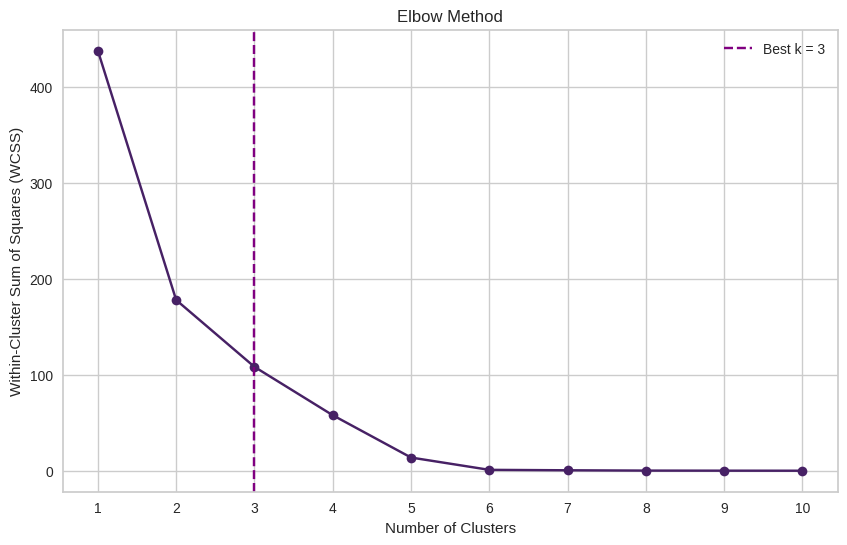

In [ ]:
K_VALUES = range(1, 11)

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(sub_data)
                for k in K_VALUES]

# CALCULATE THE BEST VALUE OF K USING ELBOW
# Calculate the within-cluster sum of squares (WCSS) for each k
#INERTIA
wcss = [model.inertia_ for model in kmeans_per_k]


second_derivative = np.diff(np.diff(wcss))
print(len(second_derivative), len(wcss))
best_k_index = np.argmax(second_derivative) + 1  # Adding 1 to account for the first diff

plt.figure(figsize=(10, 6))
plt.plot(K_VALUES, wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_VALUES)
plt.grid(True)

# Adding a vertical line for the best value of k
plt.axvline(x=best_k_index + 2, color='purple', linestyle='--', label=f'Best k = {best_k_index + 2}')
plt.legend()

plt.show()

<Figure size 500x600 with 0 Axes>

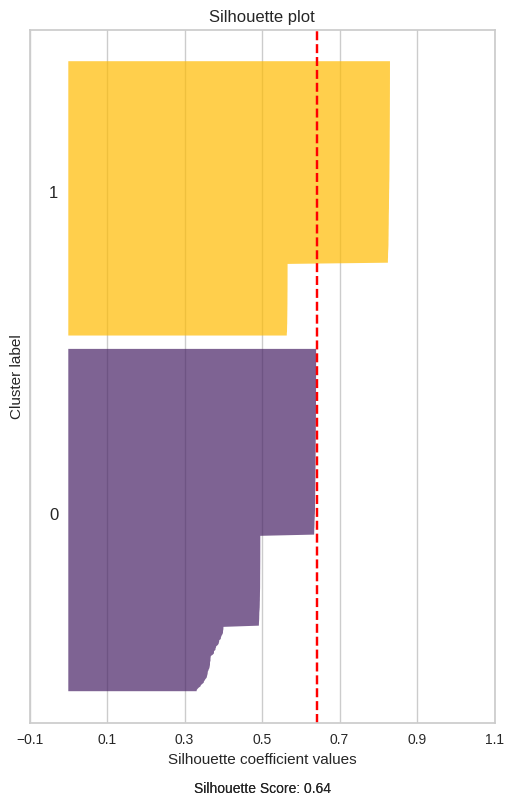

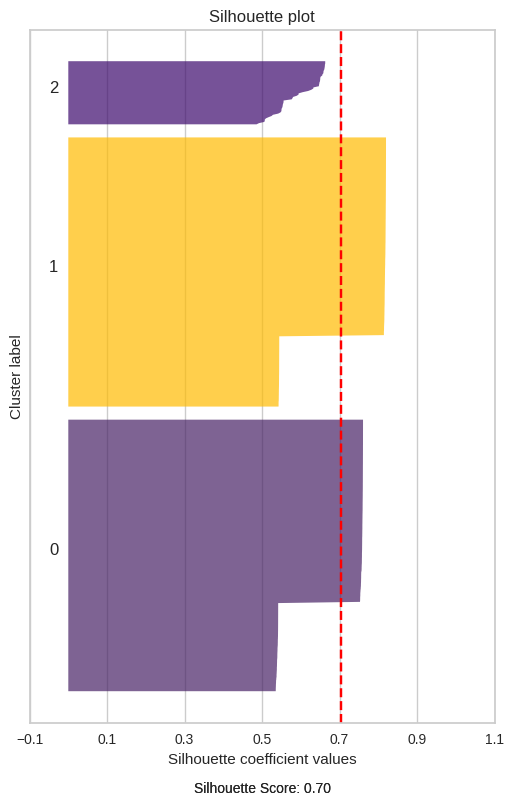

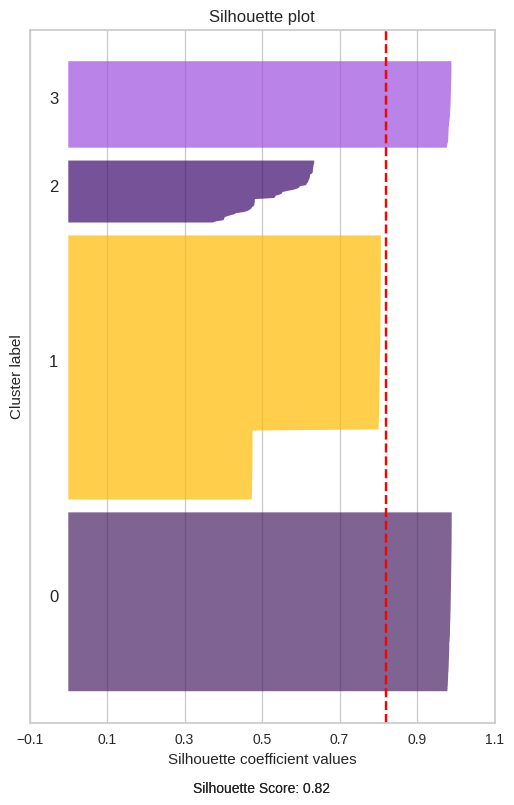

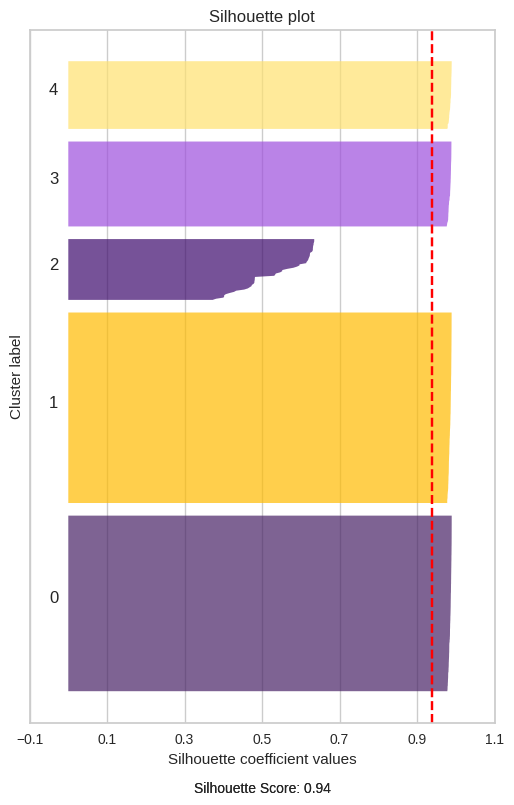

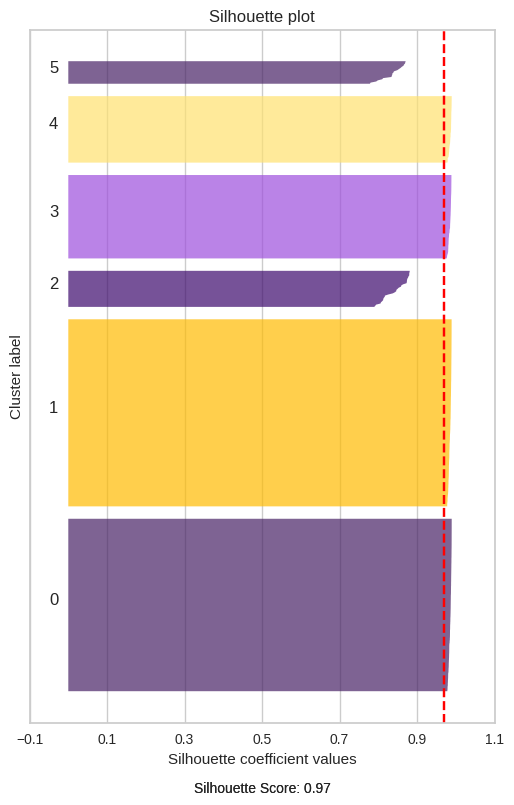

In [ ]:
plt.figure(figsize=(5, 6))
n_clusters_list = [2, 3, 4, 5, 6]

for k in n_clusters_list:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)

    plot_silhouette(data=sub_data,
                    clusterer=model,
                    n_clusters=k)


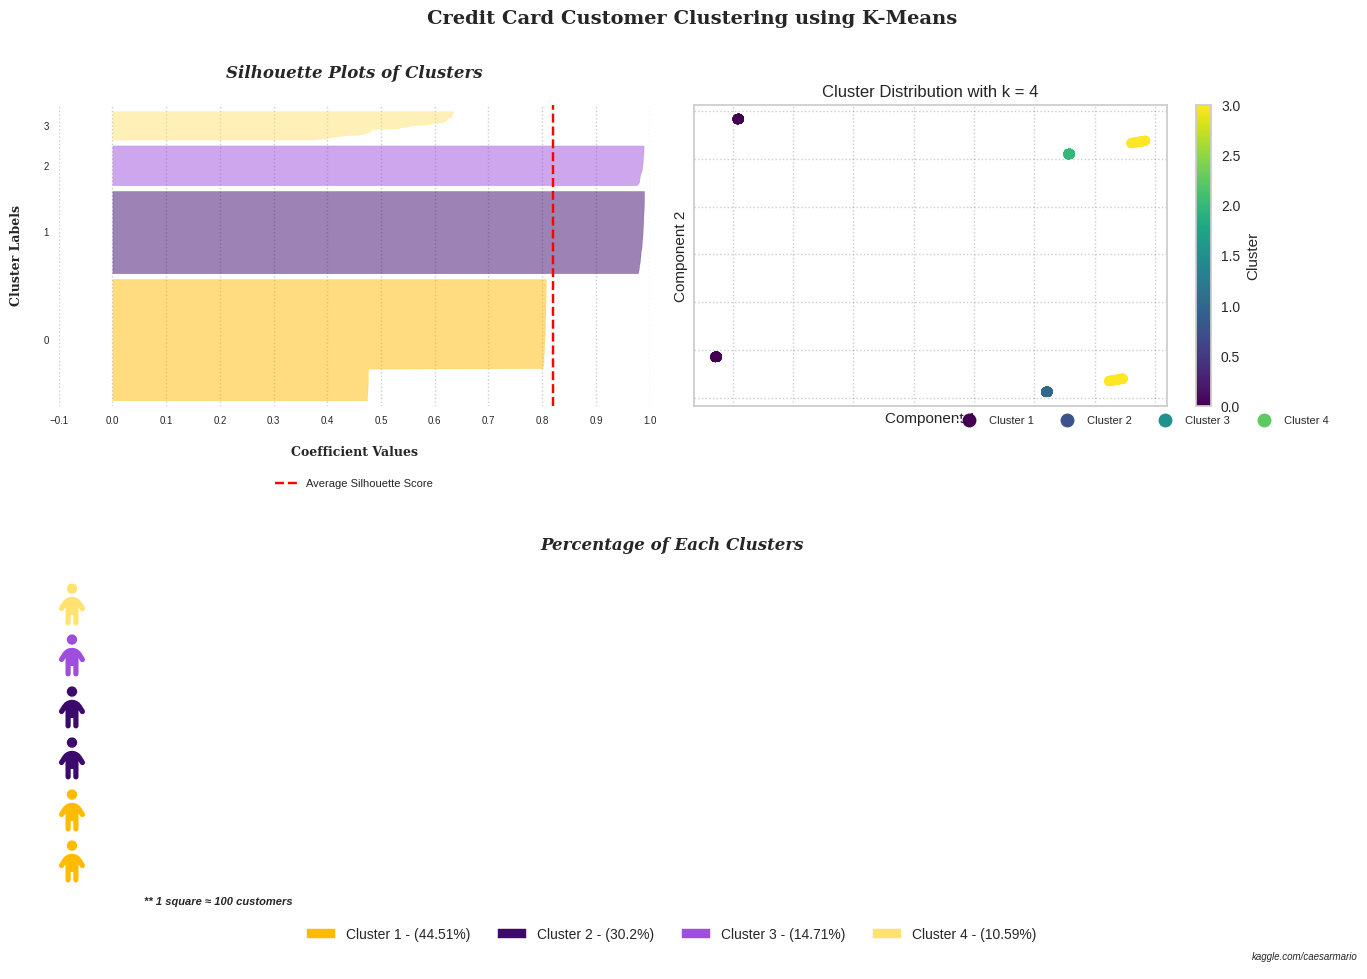

In [ ]:
# --- Implementing K-Means ---
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(sub_data)

#
def visualizer(kmeans, y_kmeans):
    """  --- Define K-Means Visualizer & Plots --- """

    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    SCATTER_STYLE=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    LEGEND_STYLE=dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    # --- Silhouette Plots ---
    s_viz = SilhouetteVisualizer(kmeans, ax=ax1, colors=cluster_colors)
    s_viz.fit(sub_data)
    s_viz.finalize()
    s_viz.ax.set_title('Silhouette Plots of Clusters\n', **title)
    s_viz.ax.tick_params(labelsize=7)
    for text in s_viz.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in s_viz.ax.spines.values():
        spine.set_color('None')
    s_viz.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), **LEGEND_STYLE)
    s_viz.ax.grid(axis='x', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    s_viz.ax.grid(axis='y', alpha=0)
    s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)

    # --- Clusters Distribution ---
    plot_cluster_data(model=kmeans,
                      data=pca_df,
                      labels=y_kmeans,
                      ax=ax2)


    # --- Waffle Chart ---
    unique, counts = np.unique(y_kmeans, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Percentage of Each Clusters\n', **title)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=wfl_square, colors=cluster_colors,
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30,
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2,
                               'frameon': False, 'fontsize':10})
    ax3.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight = 'bold', style='italic', fontsize=8)

    plt.suptitle('Credit Card Customer Clustering using K-Means\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.03, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

visualizer(kmeans, y_kmeans);

## AGGLOMARATIVE

In [ ]:
def agglomerative_clustering(data, n_clusters):
    """ perform Agglomerative Clustering and evaluate its performance """

    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(data)
    score = silhouette_score(data, labels)
    return score, labels

# Test different values of n_clusters
n_clusters_values = [5, 8,9, 11]
silhouette_scores = []
for n_clusters in n_clusters_values:
    score, labels = agglomerative_clustering(sub_data, n_clusters)
    silhouette_scores.append(score)

In [ ]:
df_results(n_clusters_values, silhouette_scores, "agglomerative_clustering")

resulted_df for agglomerative_clustering


,Number of Clusters,Silhouette Score
0,5,0.938733
1,8,0.949724
2,9,0.947006
3,11,0.948343


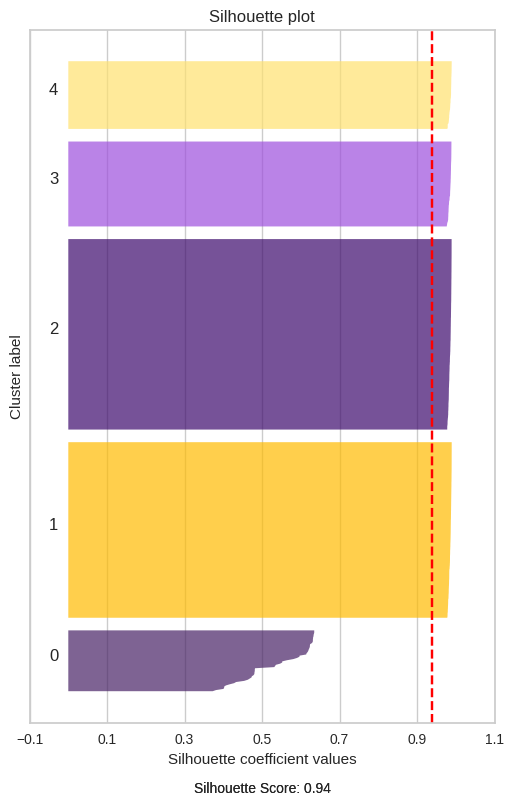

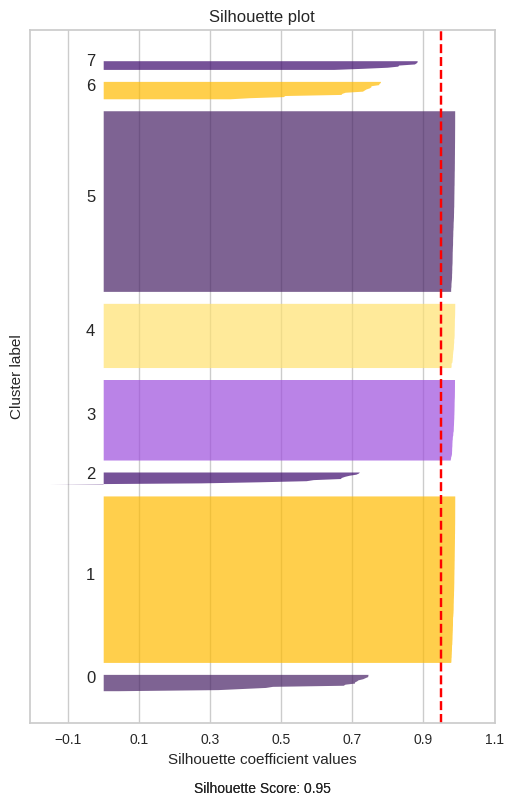

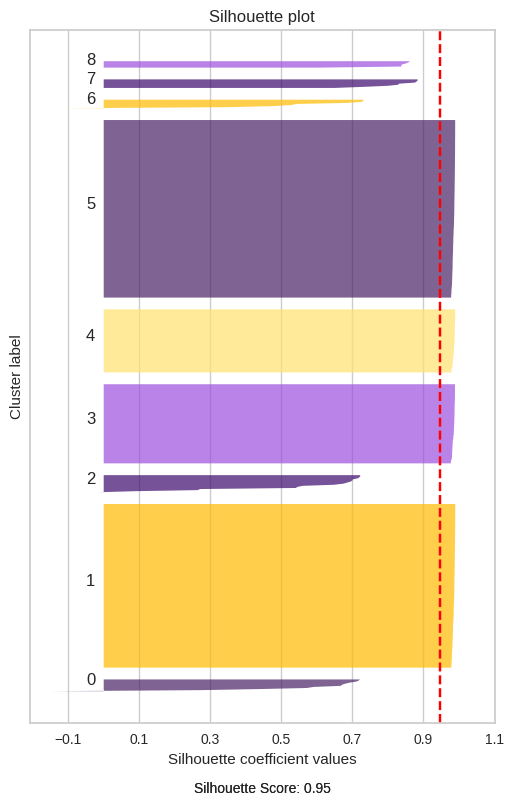

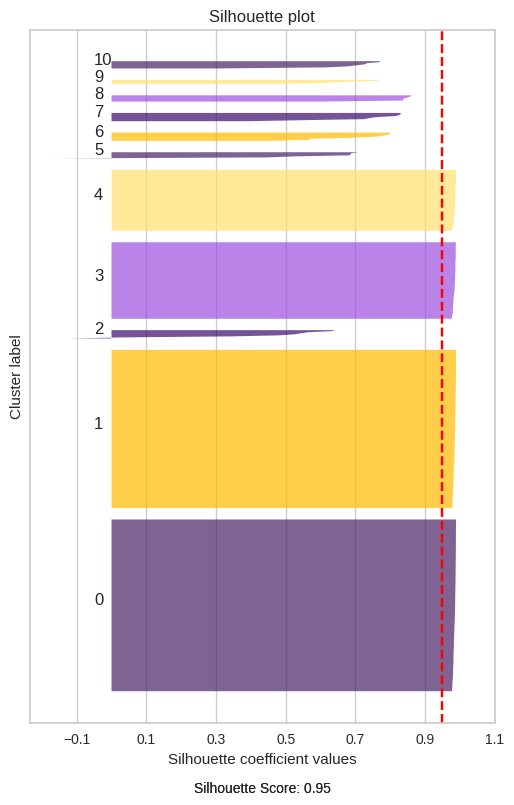

In [ ]:
# Plot silhouette scores
for num_clus in n_clusters_values:

    plot_silhouette(sub_data, AgglomerativeClustering(n_clusters=num_clus), n_clusters=num_clus)
# plot_silhouette(pca_df, AgglomerativeClustering(n_clusters=8), n_clusters=8)
# plot_silhouette(pca_df, AgglomerativeClustering(n_clusters=11), n_clusters=11)

***CALINSKI HARABASZ***

CH score = (B_k/ W_k) * ((n-k)/(k-1))

B_k: is the between-cluster dispersion matrix.

𝑊_𝑘: is the within-cluster dispersion matrix.

n: is the number of samples.

k :is the number of clusters.

Elbow Method
Definition: The elbow method involves plotting a metric (usually within-cluster sum of squares, WCSS) against the number of clusters and looking for an "elbow" point where the rate of decrease sharply slows.

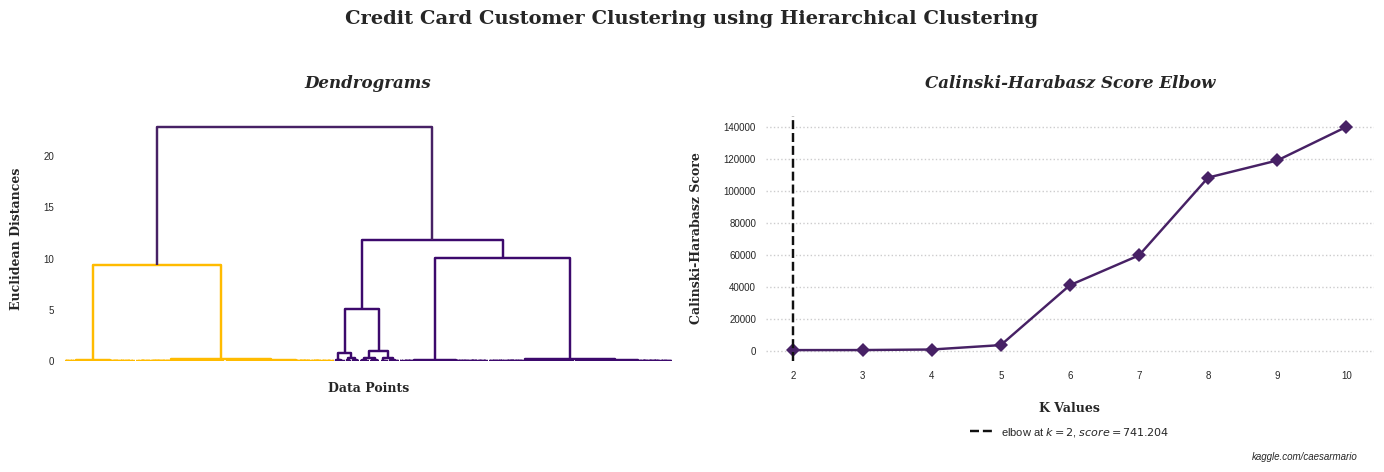

In [ ]:
# --- Define Dendrogram ---
def agg_dendrogram():

    # --- Figure Settings ---
    color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    set_palette(color_palette)
    text_style=dict(fontweight='bold', fontfamily='serif')
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    fig=plt.figure(figsize=(14, 5))

    # --- Dendrogram Plot ---
    ax1=fig.add_subplot(1, 2, 1)
    dend=shc.dendrogram(shc.linkage(sub_data, method='ward', metric='euclidean'))
    plt.axhline(y=115, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, **text_style)
    plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
    plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
    plt.tick_params(labelbottom=False)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.tick_params(labelsize=7)
    plt.title('Dendrograms\n', **title)

    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2=fig.add_subplot(1, 2, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(sub_data)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.08, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(sub_data)

{0: 10.59, 1: 30.2, 2: 32.75, 3: 14.71, 4: 11.76}


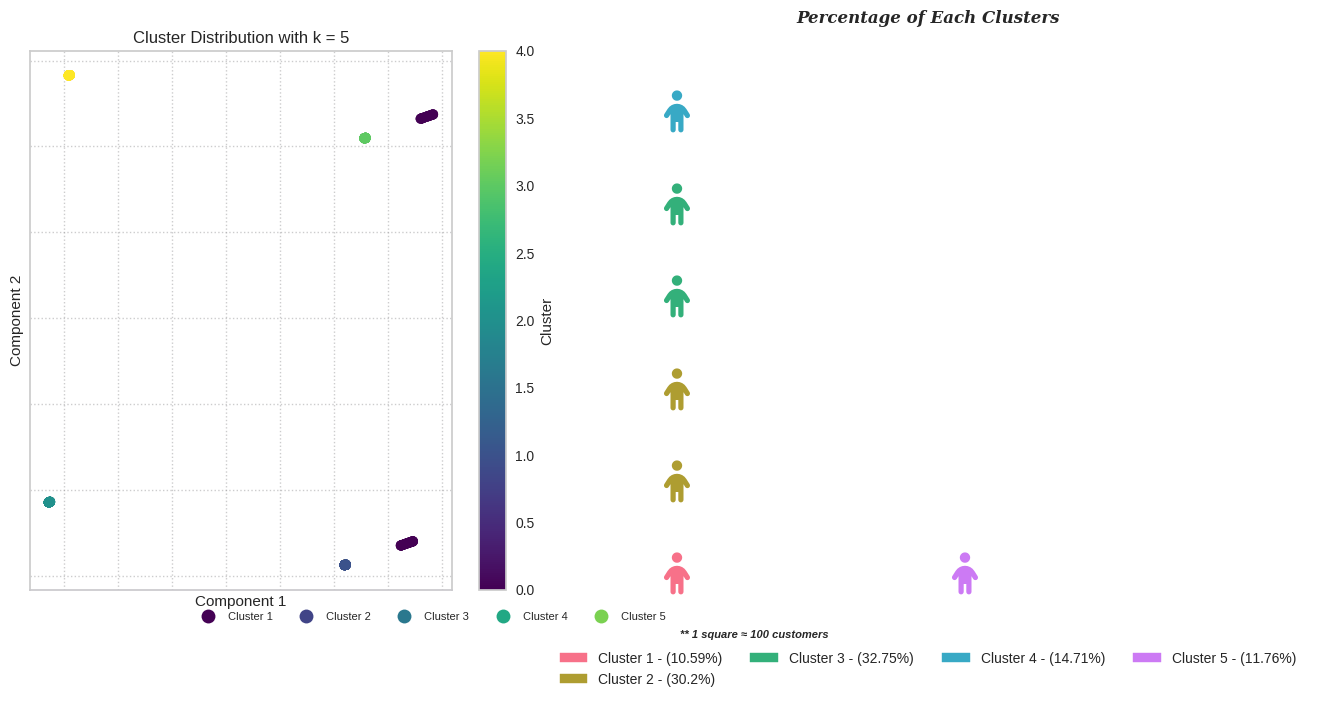

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Plot the cluster data in the first subplot
plot_cluster_data(model=agg_cluster,
                  data=pca_df,
                  labels=y_agg_cluster,
                  ax=axes[0])

# Plot the waffle chart in the second subplot
plot_waffle_chart(labels=y_agg_cluster,
                  ax=axes[1])

## DBSCAN

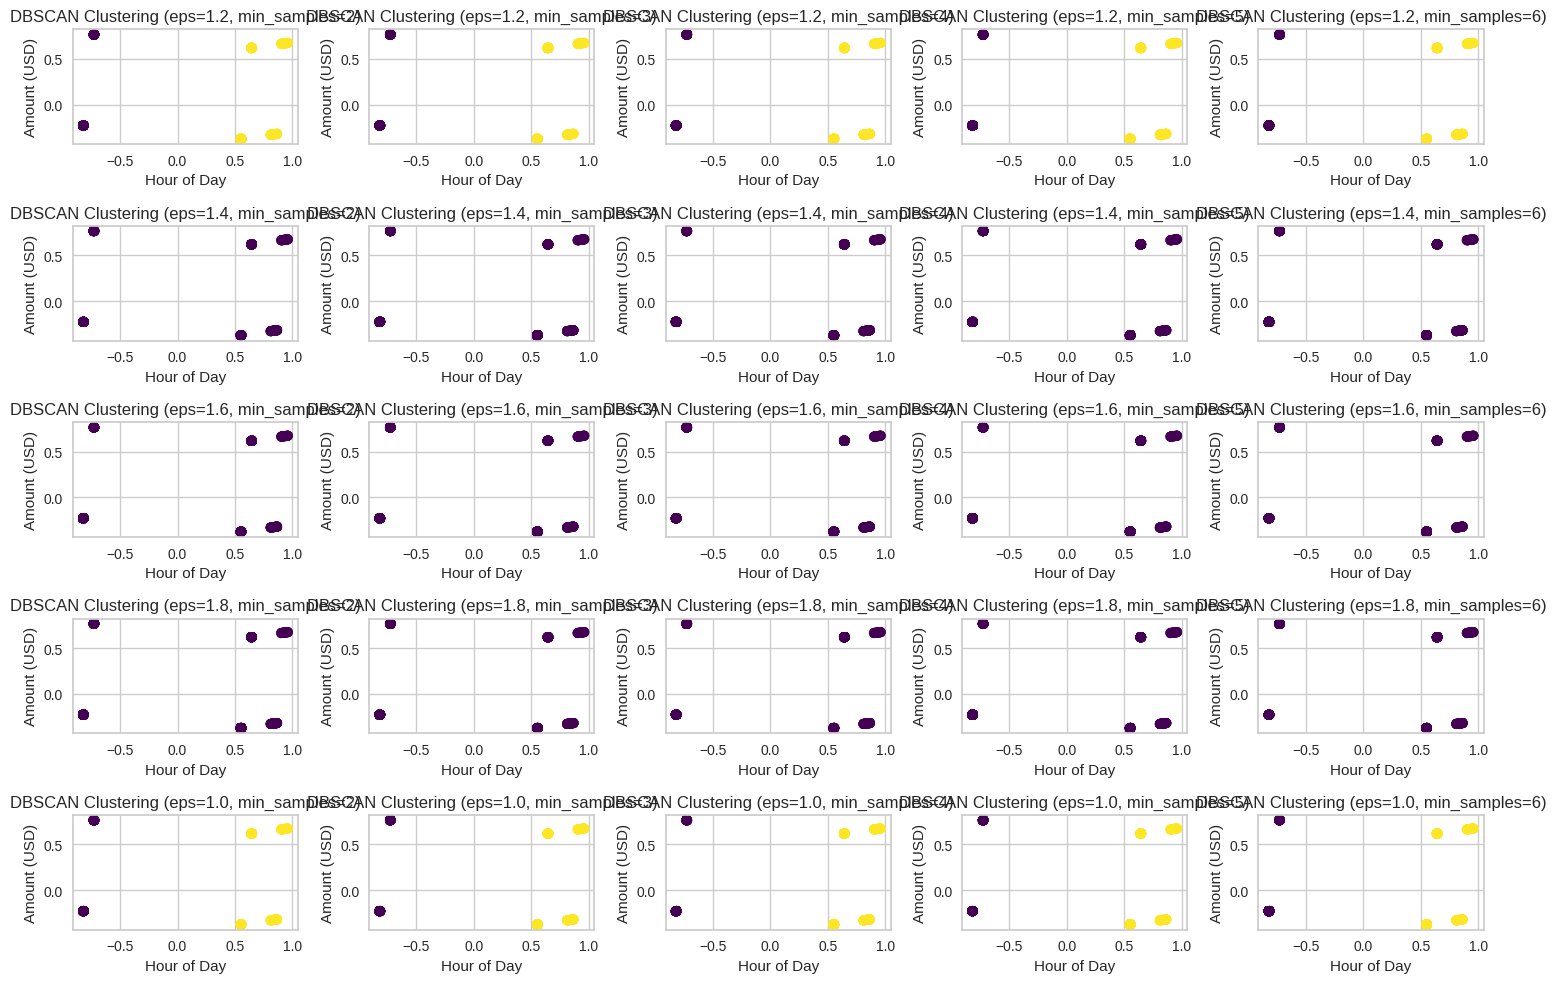

In [ ]:
from sklearn.cluster import DBSCAN

# Test multiple values of epsilon and min_samples
epsilon_values = [1.2, 1.4, 1.6, 1.8, 1.0]
min_samples_values = [2, 3, 4, 5, 6]

fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 10))

for i, eps in enumerate(epsilon_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(pca_df)

        axes[i, j].scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis')
        axes[i, j].set_xlabel('Hour of Day')
        axes[i, j].set_ylabel('Amount (USD)')
        axes[i, j].set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.tight_layout()
plt.show()

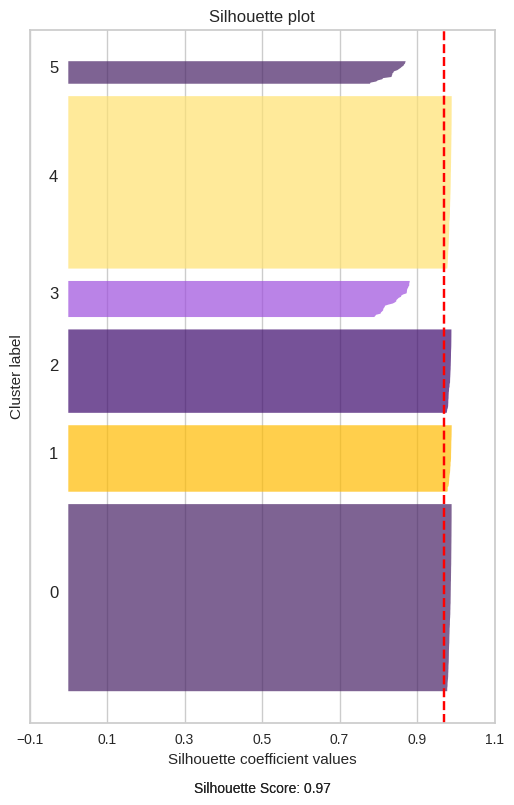

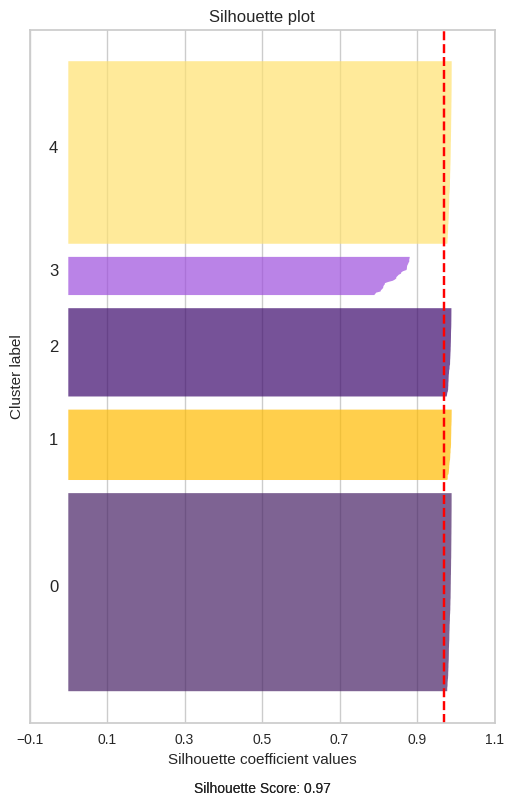

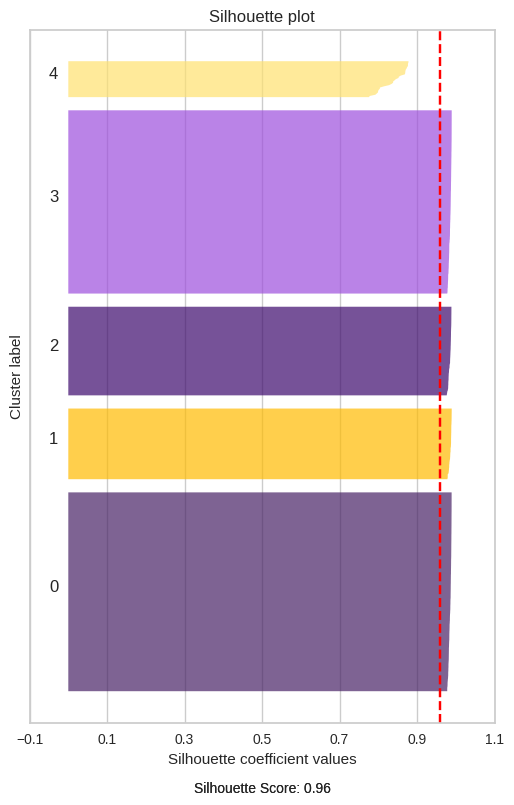

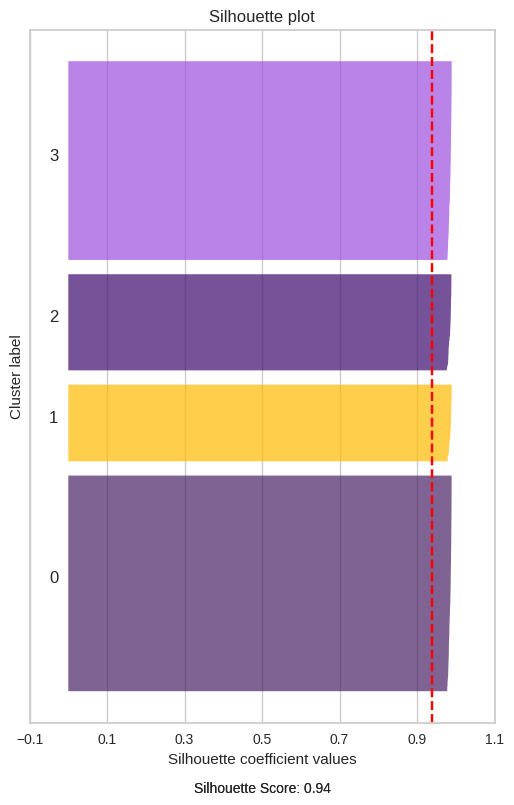

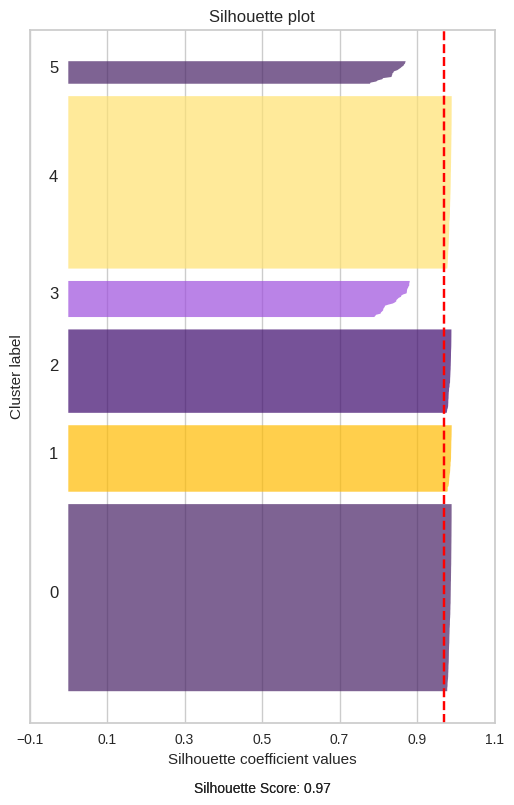

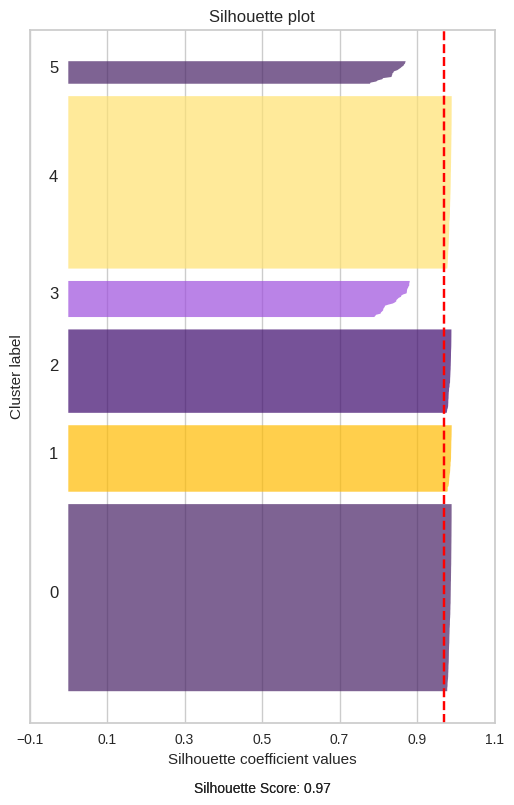

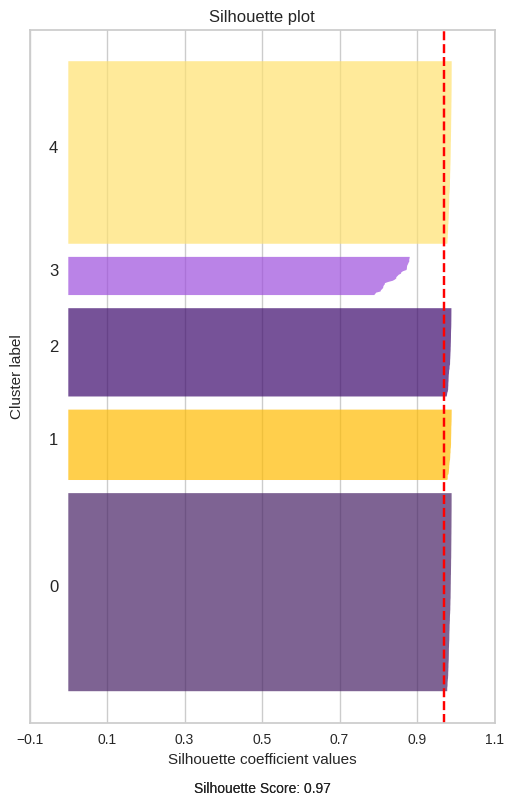

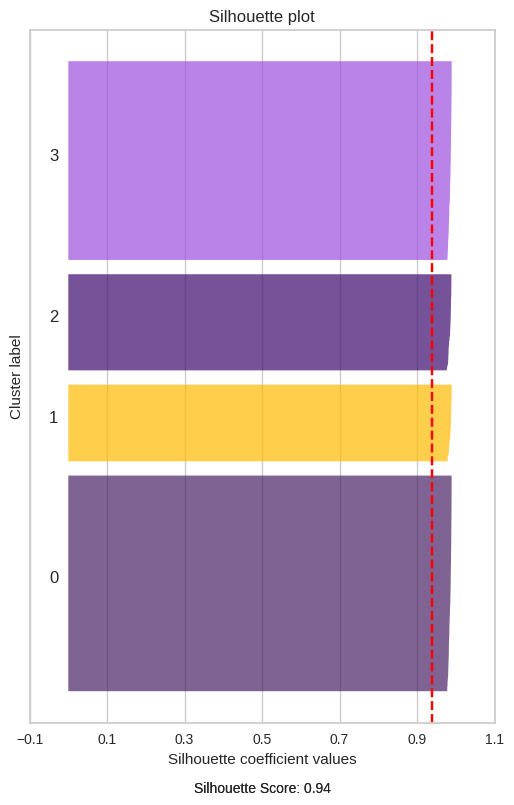

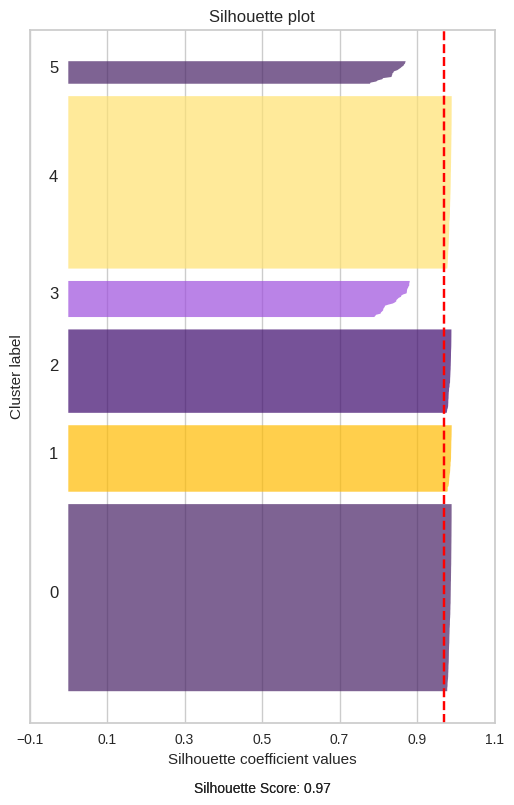

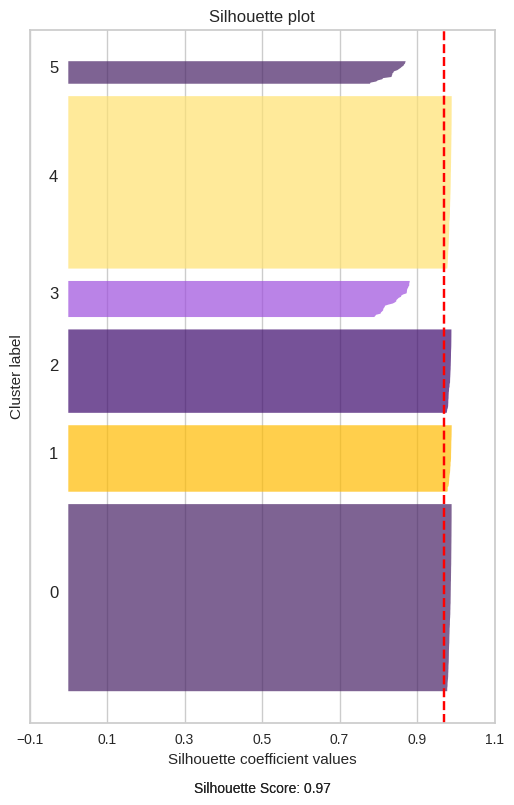

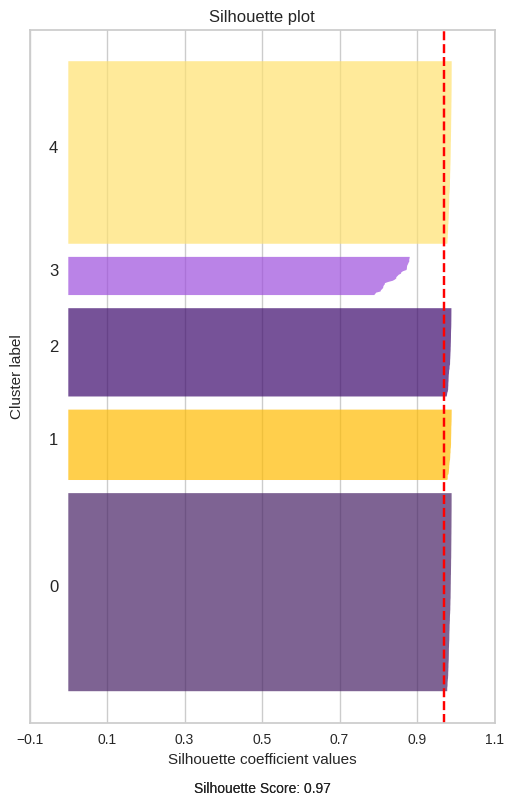

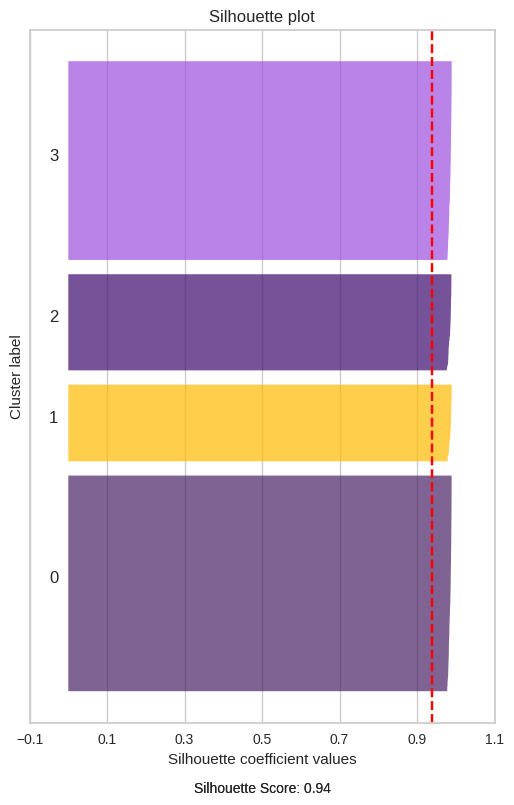

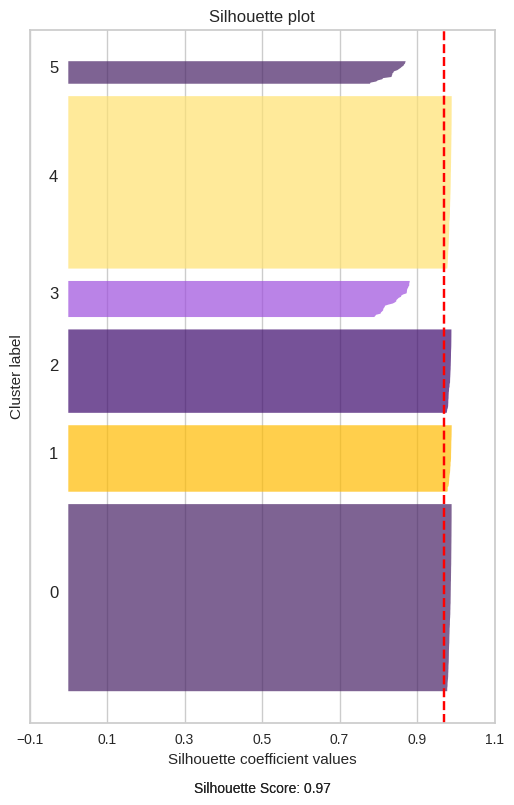

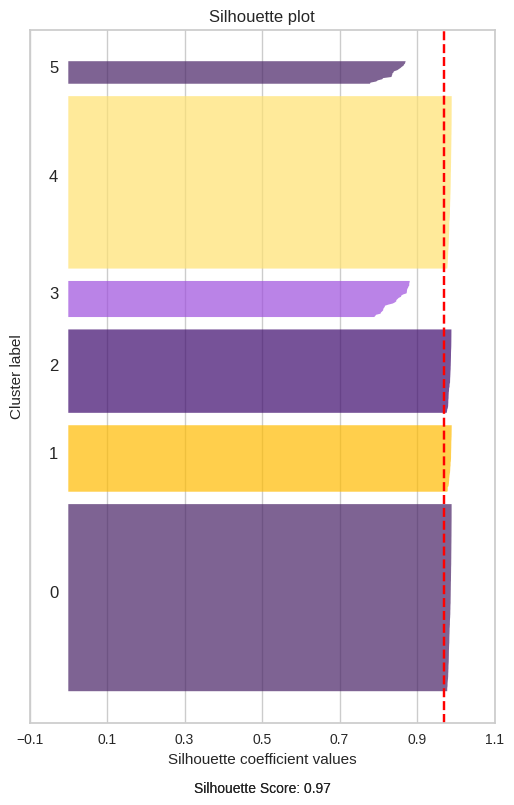

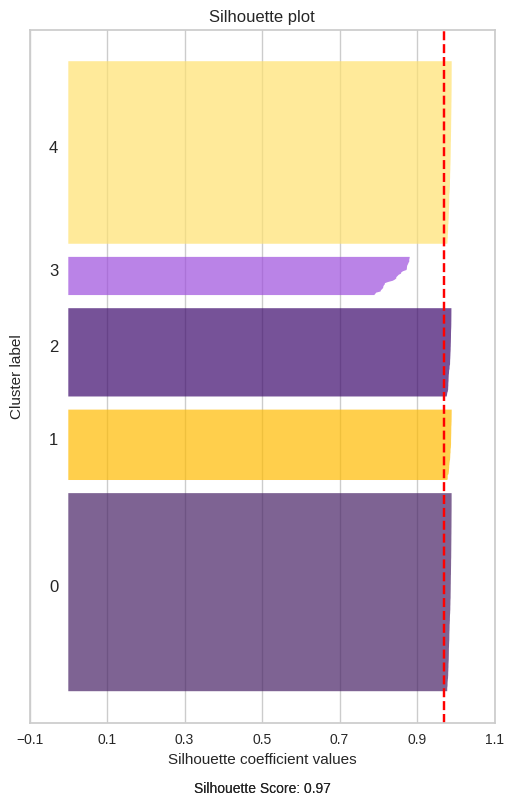

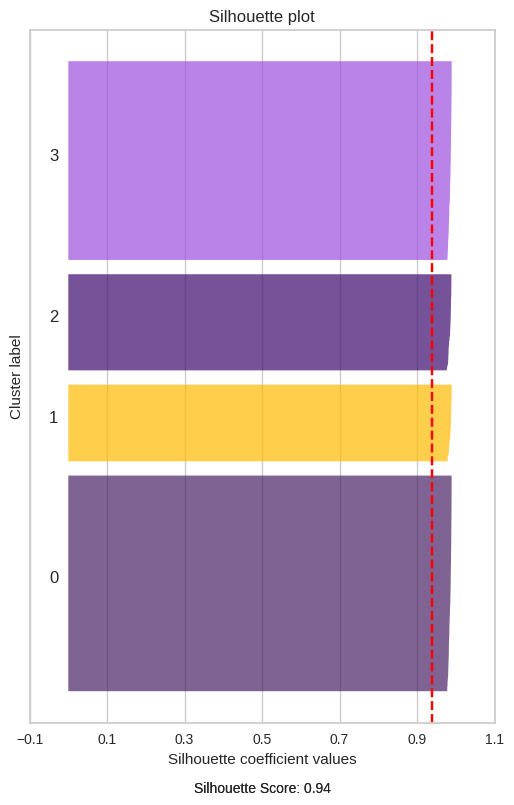

In [ ]:
from sklearn.cluster import DBSCAN

def calculate_dbscan_silhouette(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    silhouette_avg = silhouette_score(data, clusters)

    return silhouette_avg, clusters

# Test multiple values of epsilon and min_samples
epsilon_values = [0.2, 0.4, 0.6, 0.8]
min_samples_values = [10, 20, 30, 40]

n_cluster_db = []
silhouette_scores_db = []
for eps in epsilon_values:
    for min_samples in min_samples_values:
        silhouette_avg, clusters = calculate_dbscan_silhouette(sub_data, eps, min_samples)
        n_cluster_db.append(len(set(clusters)) - (1 if -1 in clusters else 0))
        silhouette_scores_db.append(silhouette_avg)
        #print(f'Silhouette Score for eps={eps}, min_samples={min_samples}: {silhouette_avg}')

        plot_silhouette(sub_data, DBSCAN(eps=eps, min_samples=min_samples), n_clusters=len(set(clusters)) - (1 if -1 in clusters else 0))


In [ ]:
df_results(n_cluster_db, silhouette_scores_db, "agglomerative_clustering")
           #min_samples=min_samples_values, eps=epsilon_values)

resulted_df for agglomerative_clustering


,Number of Clusters,Silhouette Score
0,6,0.970355
1,5,0.970355
2,5,0.960430
3,4,0.938733
4,6,0.970355
5,6,0.970355
6,5,0.970355
7,4,0.938733
8,6,0.970355
9,6,0.970355


In [ ]:
sub_data.drop('cluster_result', axis=1, inplace=True)

In [ ]:
sub_data.columns

Index(['Sales_Less_Than_50', 'Amount_in_usd', 'Product_type_Book',
       'Product_type_Online', 'hour_groups_12pm to 6pm', 'cluster_result'],
      dtype='object')

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=20)
clusters = dbscan.fit_predict(sub_data)

{0: 32.75, 1: 11.76, 2: 14.71, 3: 6.47, 4: 30.2, 5: 4.12}


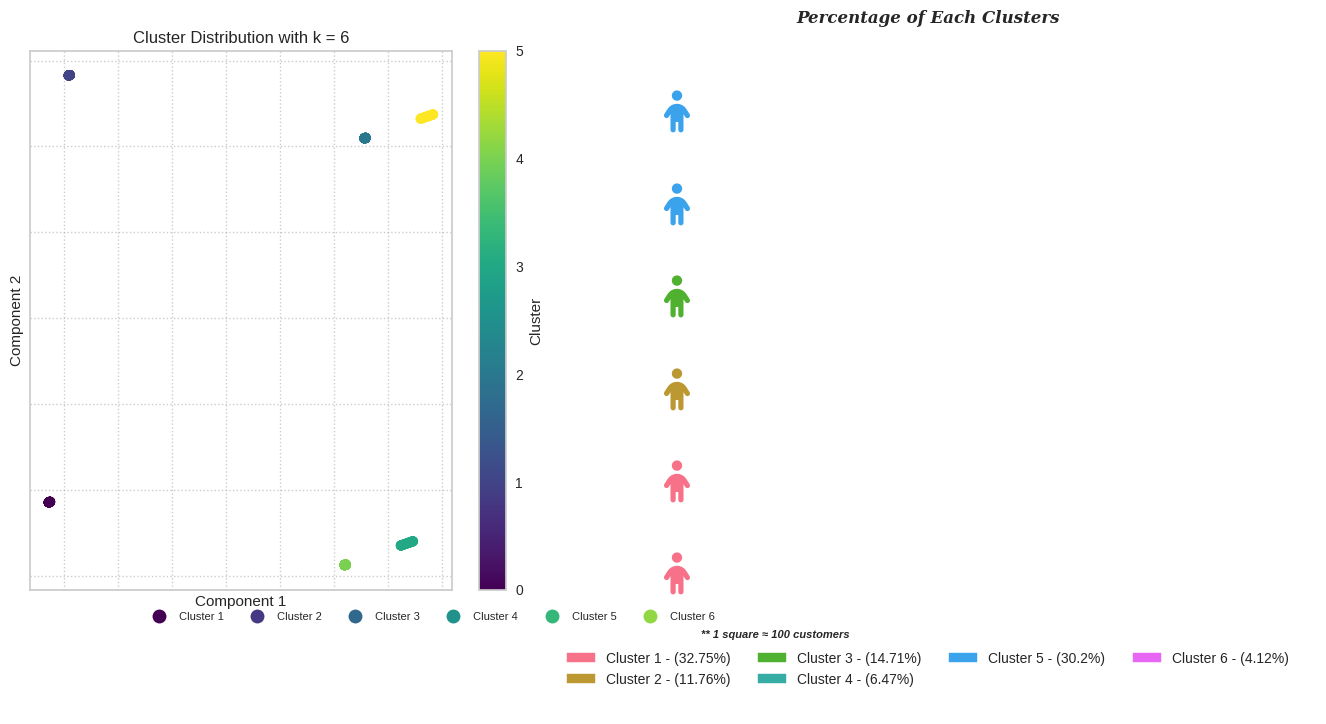

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
# Plot the cluster data in the first subplot
plot_cluster_data(model=dbscan, data=pca_df, labels=clusters, ax=axes[0])

# Plot the waffle chart in the second subplot
plot_waffle_chart(labels=clusters, ax=axes[1])

From the waffle chart, it appears that DBSCAN performs the best when the minimum samples are set to 20 and epsilon is 0.6. This configuration achieves the highest results with the best distribution, without any outliers.

# ***CONCLUSION***

this section will help us make some decision based on cluster's statistic

In [ ]:
class clr:
    start = '\033[34m'+'\033[1m'  # Blue and bold
    color = '\033[35m'  # Purple
    end = '\033[0m'  # Reset

In [ ]:
# --- Add K-Means Prediction to Data Frame ----
sub_data['cluster_result'] = y_kmeans+1
sub_data['cluster_result'] = 'Cluster '+sub_data['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = sub_data.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters ---
df_cluster_summary = sub_data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print(clr.start+'.: Summarize of Each Clusters in kmeans :.'+clr.end)
print(clr.color+'*' * 33)
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile
df_profile.style.background_gradient(cmap='RdPu')#.hide_index()

.: Summarize of Each Clusters in kmeans :.
*********************************


,Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
0,Sales_Less_Than_50,mean,1.000000,1.000000,1.000000,0.000000,0.894118
1,Amount_in_usd,mean,0.020249,0.020767,0.023216,0.790591,0.102407
2,Product_type_Book,mean,0.000000,1.000000,1.000000,1.000000,0.554902
3,Product_type_Online,mean,1.000000,0.000000,0.000000,0.000000,0.445098
4,hour_groups_12pm to 6pm,mean,0.264317,0.000000,1.000000,0.388889,0.305882


In [ ]:
# --- Add K-Means Prediction to Data Frame ----
sub_data['cluster_result'] = labels+1
sub_data['cluster_result'] = 'Cluster '+sub_data['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = sub_data.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters ---
df_cluster_summary = sub_data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print(clr.start+'.: Summarize of Each Clusters in agglmarative:.'+clr.end)
print(clr.color+'*' * 33)
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile
df_profile.style.background_gradient(cmap='RdPu')#.hide_index()

.: Summarize of Each Clusters in agglmarative:.
*********************************


,Column Name,Metrics,Cluster 1,Cluster 10,Cluster 11,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Overall
0,Sales_Less_Than_50,mean,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.894118
1,Amount_in_usd,mean,0.019941,0.808868,0.852470,0.020767,0.728283,0.023216,0.021106,0.948017,0.960239,0.639559,0.605567,0.102407
2,Product_type_Book,mean,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.554902
3,Product_type_Online,mean,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.445098
4,hour_groups_12pm to 6pm,mean,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.305882


In [ ]:
# --- Add K-Means Prediction to Data Frame ----
sub_data['cluster_result'] = clusters
sub_data['cluster_result'] = 'Cluster '+sub_data['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = sub_data.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters ---
df_cluster_summary = sub_data.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print(clr.start+'.: Summarize of Each Clusters in dbscan:.'+clr.end)
print(clr.color+'*' * 33)
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile
df_profile.style.background_gradient(cmap='RdPu')#.hide_index()

.: Summarize of Each Clusters in dbscan:.
*********************************


,Column Name,Metrics,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Overall
0,Sales_Less_Than_50,mean,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.894118
1,Amount_in_usd,mean,0.019941,0.021106,0.023216,0.795619,0.020767,0.782690,0.102407
2,Product_type_Book,mean,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.554902
3,Product_type_Online,mean,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.445098
4,hour_groups_12pm to 6pm,mean,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.305882
